<a href="https://colab.research.google.com/github/ww81/e-commerce_customer/blob/main/e_commerce_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프로젝트 목적 : 쇼핑몰 고객 행동 데이터 분석, 인사이트 도출

데이터

* 출처 : https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop

* 소개<br>
2019년 10월~ 2020년 02월까지 5개월간 데이터, 5개 파일<Br>
총  20,692,840 행 * 9 열<br>



* 특성 설명
    

|특성|설명|
|-|-|    
|event_time|	이벤트가 발생한 시간|
|event_type|	한 가지 종류의 이벤트| 
|product_id|	제품 ID|
|category_id|	제품의 카테고리 ID|
|category_code|	가능한 경우 제품의 카테고리 분류 (코드 명)|
|brand|	브랜드 이름의 다운 케이스 문자열|
|price|	제품의 가격|
|user_id|	영구 사용자 ID|
|user_session|	임시 사용자의 세션 ID.사용자가 긴 멈춤에서 온라인 상점으로 돌아올 때마다 변경됩니다|



<br><br>

|event_type|설명|
|-|-|
|view|사용자가 제품을 본 것|
|cart|사용자가 장바구니에 제품을 추가한 것|
|remove_from_cart|사용자가 장바구니에서 제품을 제거한 것|
|purchase|사용자가 제품을 구매한 것|



# 글꼴설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,575 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

# import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as patches
import plotly.express as px
import scipy.stats

In [ ]:
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기

## 날짜데이터 수정하여 저장

In [ ]:
file1 = '/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/eCommerce Events History in Cosmetics Shop/2019-Oct.csv'
file2 = '/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/eCommerce Events History in Cosmetics Shop/2019-Nov.csv'
file3 = '/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/eCommerce Events History in Cosmetics Shop/2019-Dec.csv'
file4 = '/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/eCommerce Events History in Cosmetics Shop/2020-Jan.csv'
file5 = '/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/eCommerce Events History in Cosmetics Shop/2020-Feb.csv'

#동적 변수로 파일 불러오기
filelist = [file1,file2,file3,file4,file5]
num = 1

for i in filelist:

  globals()['data{}'.format(num)] = pd.read_csv(i)
  # pd.read_csv(i)
  num += 1


In [ ]:
# data1 # 2019년 10월 고객 event
# data2 # 2019년 11월 고객 event
# data3 # 2019년 12월 고객 event
# data4 # 2020년 1월 고객 event
# data5 # 2020년 2월 고객 event

data_total = pd.concat([data1,data2,data3,data4,data5],ignore_index=True)
data_total # 2019년 10월 ~ 2020년 2월 데이터

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
...,...,...,...,...,...,...,...,...,...
20692835,2020-02-29 23:59:32 UTC,view,5885416,1487580005092295511,NaN,grattol,6.27,622082947,fb29909b-6ef5-4662-b4ee-288e73e5dc10
20692836,2020-02-29 23:59:39 UTC,cart,5550686,1487580008145748965,NaN,NaN,1.11,459705611,05d2add3-01f7-47ee-8364-27341673227f
20692837,2020-02-29 23:59:45 UTC,view,5850628,1602943681873052386,NaN,grattol,5.24,622090043,ab7d349f-db5d-4790-8ab1-31e5c894459d
20692838,2020-02-29 23:59:54 UTC,view,5716351,1487580010872045658,NaN,irisk,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [ ]:
# event time 데이터형식 바꾸기 시행착오

# data1['event_time'].dtype # ->dtype('O')
# pd.to_datetime(data1['event_time'], format='%Y-%m-%d %H:%M:%S', errors='raise') # ValueError: time data 2019-10-01 00:00:00 UTC doesn't match format specified / UTC라고 적혀있어서 그런지 날짜형식으로 변환이 안되는것 같다.

# 날짜를 자동으로 인식하게끔 해주는 것
# from dateutil.parser import parse

# parse(data1['event_time']) #->TypeError: Parser must be a string or character stream, not Series
# print(data1['event_time'][0])
# parse(data1['event_time'][0])
# pd.to_datetime(data1['event_time']) #format을 바꾸니 진행이 된다.

In [ ]:
# data1['event_time_2']= pd.to_datetime(data1['event_time'])
data1['event_time_2']= pd.to_datetime(data1['event_time_2'])

# data1['event_time_2'].strftime('%Y-%m') #->AttributeError: 'Series' object has no attribute 'strftime'
# data1['month'] = data1['event_time_2'].apply(lambda _ : datetime.strftime(_,'%Y-%m'))  
# data1['day_of_week'] = data1['event_time_2'].dt.day_name()
data1['day'] = data1['event_time_2'].apply(lambda _ : datetime.strftime(_,'%d'))  
data1['hour'] = data1['event_time_2'].apply(lambda _ : datetime.strftime(_,'%H'))  


data1.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data1.csv',index=False)

In [ ]:
# data2['event_time_2']= pd.to_datetime(data2['event_time'])
data2['event_time_2']= pd.to_datetime(data2['event_time_2'])

# data2['month'] = data2['event_time_2'].apply(lambda _ : datetime.strftime(_,'%Y-%m'))
# data2['day_of_week'] = data2['event_time_2'].dt.day_name()
data2['day'] = data2['event_time_2'].apply(lambda _ : datetime.strftime(_,'%d'))  
data2['hour'] = data2['event_time_2'].apply(lambda _ : datetime.strftime(_,'%H'))  

data2.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data2.csv',index=False)

In [ ]:
# data3['event_time_2']= pd.to_datetime(data3['event_time'])
data3['event_time_2']= pd.to_datetime(data3['event_time_2'])

# data3['month'] = data3['event_time_2'].apply(lambda _ : datetime.strftime(_,'%Y-%m'))
# data3['day_of_week'] = data3['event_time_2'].dt.day_name()
data3['day'] = data3['event_time_2'].apply(lambda _ : datetime.strftime(_,'%d'))  
data3['hour'] = data3['event_time_2'].apply(lambda _ : datetime.strftime(_,'%H')) 

data3.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data3.csv',index=False)

In [ ]:
# data4['event_time_2']= pd.to_datetime(data4['event_time'])
data4['event_time_2']= pd.to_datetime(data4['event_time_2'])

# data4['month'] = data4['event_time_2'].apply(lambda _ : datetime.strftime(_,'%Y-%m'))
# data4['day_of_week'] = data4['event_time_2'].dt.day_name()
data4['day'] = data4['event_time_2'].apply(lambda _ : datetime.strftime(_,'%d'))  
data4['hour'] = data4['event_time_2'].apply(lambda _ : datetime.strftime(_,'%H')) 

data4.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data4.csv',index=False)

In [ ]:
# data5['event_time_2']= pd.to_datetime(data5['event_time'])
data5['event_time_2']= pd.to_datetime(data5['event_time_2'])

# data5['month'] = data5['event_time_2'].apply(lambda _ : datetime.strftime(_,'%Y-%m'))
# data5['day_of_week'] = data5['event_time_2'].dt.day_name()
data5['day'] = data5['event_time_2'].apply(lambda _ : datetime.strftime(_,'%d'))  
data5['hour'] = data5['event_time_2'].apply(lambda _ : datetime.strftime(_,'%H')) 

data5.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data5.csv',index=False)

##시간데이터 처리한 것으로 불러오기


In [ ]:
#시간데이터 처리한 것으로 불러오기
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data2.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data3.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data4.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data5.csv')
data_total = pd.concat([data1,data2,data3,data4,data5],ignore_index=True)

data1.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
event_time_2      object
month             object
day_of_week       object
day                int64
hour               int64
dtype: object

# 데이터 EDA & 전처리

In [ ]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20692840 entries, 0 to 20692839
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
 9   event_time_2   object 
 10  month          object 
 11  day_of_week    object 
 12  day            int64  
 13  hour           int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.2+ GB


## 결측값, 중복값

### 확인

In [ ]:
# 결측값 확인
data_total.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    20339246
brand             8757117
price                   0
user_id                 0
user_session         4598
event_time_2            0
month                   0
dtype: int64

In [ ]:
data_total['category_code'].value_counts()

appliances.environment.vacuum             149168
stationery.cartrige                        59728
apparel.glove                              52575
furniture.living_room.cabinet              30560
accessories.bag                            24253
furniture.bathroom.bath                    23931
appliances.personal.hair_cutter             5384
accessories.cosmetic_bag                    3644
appliances.personal.massager                3296
appliances.environment.air_conditioner       708
furniture.living_room.chair                  343
sport.diving                                   4
Name: category_code, dtype: int64

In [ ]:
data_total[data_total['category_code']=='appliances.environment.air_conditioner']

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_2,month,day_of_week,day,hour
17877,2019-10-01 06:50:33 UTC,view,5689160,1487580008221246441,appliances.environment.air_conditioner,markell,3.25,555220690,ca95075b-3669-4011-83e7-3418d2acdb30,2019-10-01 06:50:33+00:00,2019-10,Tuesday,1,6
54214,2019-10-01 11:32:50 UTC,view,5826722,1783999067181810204,appliances.environment.air_conditioner,nirvel,5.14,555603118,acdc06f9-c87c-4dd8-9bc3-f4bf6810eff8,2019-10-01 11:32:50+00:00,2019-10,Tuesday,1,11
54347,2019-10-01 11:33:27 UTC,cart,5826722,1783999067181810204,appliances.environment.air_conditioner,nirvel,5.14,555603118,acdc06f9-c87c-4dd8-9bc3-f4bf6810eff8,2019-10-01 11:33:27+00:00,2019-10,Tuesday,1,11
57163,2019-10-01 11:57:16 UTC,view,5826722,1783999067181810204,appliances.environment.air_conditioner,nirvel,5.14,555603118,acdc06f9-c87c-4dd8-9bc3-f4bf6810eff8,2019-10-01 11:57:16+00:00,2019-10,Tuesday,1,11
57208,2019-10-01 11:57:51 UTC,remove_from_cart,5826722,1783999067181810204,appliances.environment.air_conditioner,nirvel,5.14,555603118,acdc06f9-c87c-4dd8-9bc3-f4bf6810eff8,2019-10-01 11:57:51+00:00,2019-10,Tuesday,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486968,2020-02-28 12:52:38 UTC,view,5689162,1487580008221246441,appliances.environment.air_conditioner,markell,3.65,621473214,222fce01-0d01-46eb-849f-27cb6d57a8f4,2020-02-28 12:52:38+00:00,2020-02,Friday,28,12
20525892,2020-02-28 18:28:20 UTC,view,5858179,1783999067181810204,appliances.environment.air_conditioner,NaN,2.70,566667766,7cc75795-595f-4fb6-b0bb-bf1b0377c05a,2020-02-28 18:28:20+00:00,2020-02,Friday,28,18
20589470,2020-02-29 09:32:50 UTC,view,5866986,1783999067181810204,appliances.environment.air_conditioner,cutrin,13.22,619772113,e93707ba-1902-474c-aa4d-7bd82018595e,2020-02-29 09:32:50+00:00,2020-02,Saturday,29,9
20662823,2020-02-29 18:57:47 UTC,view,5858179,1783999067181810204,appliances.environment.air_conditioner,NaN,2.70,527605803,c529bd9c-c2be-40c0-aa4d-19663902ed85,2020-02-29 18:57:47+00:00,2020-02,Saturday,29,18


In [ ]:
data_total[data_total['category_id']==1487580008221246441]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_2,month,day_of_week,day,hour
17877,2019-10-01 06:50:33 UTC,view,5689160,1487580008221246441,appliances.environment.air_conditioner,markell,3.25,555220690,ca95075b-3669-4011-83e7-3418d2acdb30,2019-10-01 06:50:33+00:00,2019-10,Tuesday,1,6
293451,2019-10-02 17:40:08 UTC,view,5586690,1487580008221246441,appliances.environment.air_conditioner,NaN,12.68,551130327,f562f7ec-eb96-4101-ba6d-9e979f511be5,2019-10-02 17:40:08+00:00,2019-10,Wednesday,2,17
1199950,2019-10-08 20:57:33 UTC,view,5738742,1487580008221246441,appliances.environment.air_conditioner,matrix,21.67,477558166,4f7eb462-25a8-4166-90a3-af3d2218142f,2019-10-08 20:57:33+00:00,2019-10,Tuesday,8,20
1384706,2019-10-10 09:14:20 UTC,view,5649273,1487580008221246441,appliances.environment.air_conditioner,concept,5.48,558737269,be80cc12-e4b7-4b86-ac22-bc26effc6286,2019-10-10 09:14:20+00:00,2019-10,Thursday,10,9
1466308,2019-10-10 20:11:09 UTC,view,5677040,1487580008221246441,appliances.environment.air_conditioner,estel,6.51,453206143,af61bbbc-9d66-4514-99d8-ca253561db95,2019-10-10 20:11:09+00:00,2019-10,Thursday,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19396275,2020-02-20 11:29:02 UTC,view,5740774,1487580008221246441,appliances.environment.air_conditioner,markell,3.79,613869493,aa6e3261-e945-4688-9b8a-32b6c035e2e2,2020-02-20 11:29:02+00:00,2020-02,Thursday,20,11
19726004,2020-02-23 09:29:10 UTC,view,5739060,1487580008221246441,appliances.environment.air_conditioner,kapous,5.79,619167608,dafd9ccc-0088-45e2-801e-7b2a7497d92d,2020-02-23 09:29:10+00:00,2020-02,Sunday,23,9
19765360,2020-02-23 15:08:46 UTC,view,5777686,1487580008221246441,appliances.environment.air_conditioner,matrix,23.81,438034323,edb8090f-0d60-ec5e-cb47-c51985d4bcdd,2020-02-23 15:08:46+00:00,2020-02,Sunday,23,15
19788017,2020-02-23 18:20:08 UTC,view,5677040,1487580008221246441,appliances.environment.air_conditioner,estel,6.51,599553222,d1021f67-9b43-45d7-ba1f-186875c996b2,2020-02-23 18:20:08+00:00,2020-02,Sunday,23,18


In [ ]:
data_total[data_total['category_code'].notnull()==True][['category_id','category_code']].drop_duplicates()

,category_id,category_code
21,1487580006350586771,appliances.environment.vacuum
264,1487580013053083824,stationery.cartrige
877,2007399943458784057,apparel.glove
1723,1487580010695884882,accessories.bag
1928,2193074740619379535,furniture.living_room.cabinet
2940,2193074740686488401,furniture.bathroom.bath
4004,1487580008070251489,appliances.personal.hair_cutter
5204,1487580011970953351,furniture.bathroom.bath
16998,1921723506584715388,accessories.cosmetic_bag
17877,1487580008221246441,appliances.environment.air_conditioner



category_code    20339246  <- 거의 대부분이 결측값, category_id 데이터를 활용해야 겠다. <br>
brand             8757117  <- 30% 정도 결측값<br>
user_session         4598  <- 임시 값이므로 상관없다.<br>
<br>
=> <br>
category_code, user_session 데이터 분석에서 제외<br>
brand 제외 보류<br>


In [ ]:
# 중복값 확인
data_total.duplicated().sum()

1109098

중복값이 1109098개나? 같은 시간에 같은 제품을 두번 본 것 인가... <br>
무시해도 되는 것인지, 제거를 해야하는 것인지 중복인 데이터를 확인해본다.

In [ ]:
df_duplicated = data_total[data_total.duplicated(keep='last')]
df_duplicated

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_2,month
12,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:30+00:00,2019-10
29,2019-10-01 00:01:05 UTC,remove_from_cart,5858981,1487580007634043851,NaN,de.lux,0.79,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:01:05+00:00,2019-10
34,2019-10-01 00:01:07 UTC,remove_from_cart,5312,1487580009471148064,NaN,runail,1.27,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486,2019-10-01 00:01:07+00:00,2019-10
37,2019-10-01 00:01:10 UTC,remove_from_cart,5823915,1487580007432717250,NaN,milv,1.59,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:01:10+00:00,2019-10
50,2019-10-01 00:01:24 UTC,remove_from_cart,5664641,1487580011425693811,NaN,NaN,0.70,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:01:24+00:00,2019-10
...,...,...,...,...,...,...,...,...,...,...,...
20692734,2020-02-29 23:55:08 UTC,remove_from_cart,5700037,1487580009286598681,NaN,runail,0.40,554827699,64d0186e-346f-459d-9f65-1dc1f72deaa2,2020-02-29 23:55:08+00:00,2020-02
20692747,2020-02-29 23:55:20 UTC,remove_from_cart,5814523,1487580005092295511,NaN,runail,4.44,554827699,64d0186e-346f-459d-9f65-1dc1f72deaa2,2020-02-29 23:55:20+00:00,2020-02
20692749,2020-02-29 23:55:23 UTC,remove_from_cart,5853233,1487580005134238553,NaN,runail,3.17,554827699,64d0186e-346f-459d-9f65-1dc1f72deaa2,2020-02-29 23:55:23+00:00,2020-02
20692799,2020-02-29 23:57:53 UTC,remove_from_cart,5730498,1487580010872045658,NaN,NaN,0.79,621669991,daa3c677-5360-4327-847e-d29658716b99,2020-02-29 23:57:53+00:00,2020-02


In [ ]:
data_total[11:14]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_2,month
11,2019-10-01 00:00:28 UTC,remove_from_cart,5834172,1487580013522845895,NaN,runail,0.95,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:28+00:00,2019-10
12,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:30+00:00,2019-10
13,2019-10-01 00:00:30 UTC,remove_from_cart,5809103,1487580013522845895,NaN,irisk,0.60,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:30+00:00,2019-10


event_type 이 수상하다. remove_from_cart 데이터만 있는게 아닌가?

In [ ]:
print(df_duplicated[['event_type']].value_counts())
print('\n\n비율로보면\n')
df_duplicated[['event_type']].value_counts(normalize=True)

event_type      
remove_from_cart    991820
cart                115342
view                  1031
purchase               905
dtype: int64


비율로보면



event_type      
remove_from_cart    0.894258
cart                0.103996
view                0.000930
purchase            0.000816
dtype: float64

제거 데이터만 있는줄 알았는데 아니네...그래도 제거의 갯수가 상당히 많다. 원래 데이터에서 제거 데이터의 비율과 비교해서 큰차이가 날 것 같은데 확인해보자. 오류로 데이터가 중복되는 것이 아닐까 싶다.그렇다면 제거하고 보는 것이 좋을 것 같다.

In [ ]:
print(data_total[['event_type']].value_counts())
print('\n\n비율로보면\n')
data_total[['event_type']].value_counts(normalize=True)

event_type      
view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
dtype: int64


비율로보면



event_type      
view                0.466723
cart                0.278760
remove_from_cart    0.192322
purchase            0.062196
dtype: float64

역시 차이가 난다. 전체 데이터 수가 20,692,840개 인데 중복데이터가 1,109,098개 로 5% 정도 해당된다. 제거 해도 될 것 같다.

### 처리

In [ ]:
# 중복데이터 제거하고 필요없는 컬럼 빼는 코드
data_total.drop_duplicates(keep='first',inplace=True)
data_total.drop(['category_code', 'user_session','event_time'], axis=1, inplace=True)

In [ ]:
data_total

,event_type,product_id,category_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour
0,cart,5773203,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0
1,cart,5773353,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0
2,cart,5881589,2151191071051219817,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0
3,cart,5723490,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0
4,cart,5881449,1487580013522845895,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20692835,view,5885416,1487580005092295511,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23
20692836,cart,5550686,1487580008145748965,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23
20692837,view,5850628,1602943681873052386,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23
20692838,view,5716351,1487580010872045658,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23


## feature별 데이터 확인

### event time, time & type

2019-10    3889128
2019-11    4389144
2019-12    3349426
2020-01    4039652
2020-02    3916392
Name: month, dtype: int64 

평균: 3916748.4 



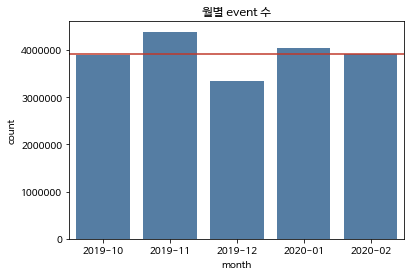

In [ ]:
#월별 데이터수 
print(data_total['month'].value_counts().sort_index(),"\n")
print("평균:",data_total['month'].value_counts().mean(),"\n")
sns.countplot(x='month', data=data_total,color='#487eb0');
plt.axhline(data_total['month'].value_counts().mean(),color='#c0392b')

plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('월별 event 수')

plt.show()

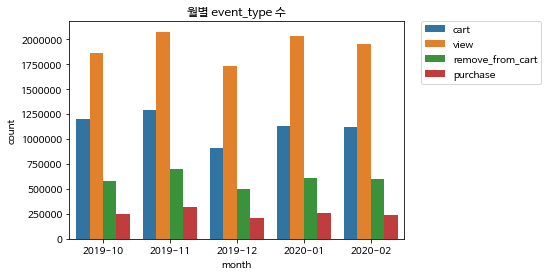

In [ ]:
#월별 event type
sns.color_palette("husl", 8) # 왜 색이 안변하지?
sns.countplot(x='month', data=data_total,hue='event_type');
plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('월별 event_type 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례, 그래프 밖으로

plt.show()

Friday       2791433
Monday       2864715
Saturday     2510940
Sunday       2620821
Thursday     2972446
Tuesday      2884042
Wednesday    2939345
Name: day_of_week, dtype: int64 

평균: 2797677.4285714286 



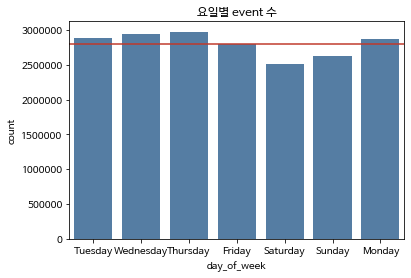

In [ ]:
#요일별 데이터수 
print(data_total['day_of_week'].value_counts().sort_index(),"\n")
print("평균:",data_total['day_of_week'].value_counts().mean(),"\n")

sns.countplot(x='day_of_week', data=data_total,color='#487eb0');
plt.axhline(data_total['day_of_week'].value_counts().mean(),color='#c0392b')

plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('요일별 event 수')

plt.show()

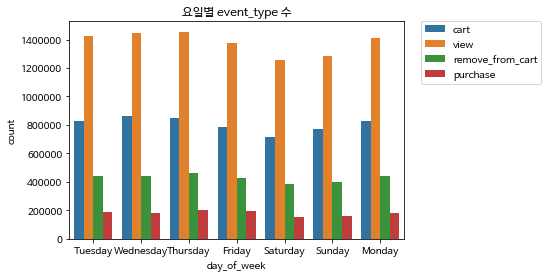

In [ ]:
#요일별 event type

sns.countplot(x='day_of_week', data=data_total,hue='event_type');
plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('요일별 event_type 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례, 그래프 밖으로


0      191679
1      173152
2      189887
3      263958
4      374424
5      568563
6      770554
7      919340
8     1013092
9     1074329
10    1130990
11    1167995
12    1181331
13    1118420
14    1050189
15    1007871
16    1043811
17    1117221
18    1228095
19    1287480
20    1159423
21     797832
22     477745
23     276361
Name: hour, dtype: int64 



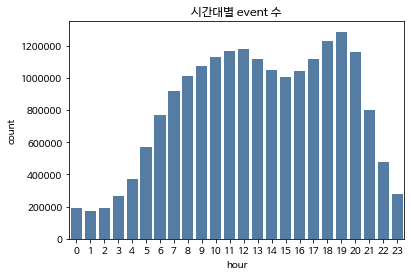

In [ ]:
#시간대별 데이터수 
print(data_total['hour'].value_counts().sort_index(),"\n")

sns.countplot(x='hour', data=data_total,color='#487eb0');
plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('시간대별 event 수')

plt.show()

0      191679
1      173152
2      189887
3      263958
4      374424
5      568563
6      770554
7      919340
8     1013092
9     1074329
10    1130990
11    1167995
12    1181331
13    1118420
14    1050189
15    1007871
16    1043811
17    1117221
18    1228095
19    1287480
20    1159423
21     797832
22     477745
23     276361
Name: hour, dtype: int64 



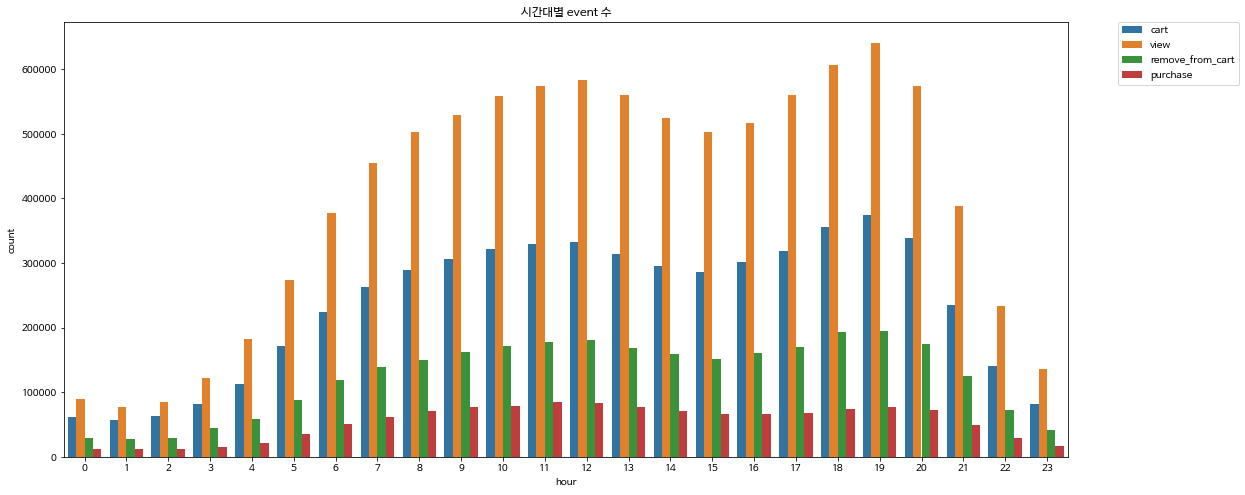

In [ ]:
#시간대별 데이터수 
print(data_total['hour'].value_counts().sort_index(),"\n")

plt.figure(figsize=(18,8)) # 사이즈 변경 
sns.countplot(x='hour', data=data_total,hue='event_type');
plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('시간대별 event 수')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # 범례, 그래프 밖으로

plt.show()

### event type

cart                5652991
purchase            1286102
remove_from_cart    2987859
view                9656790
Name: event_type, dtype: int64 



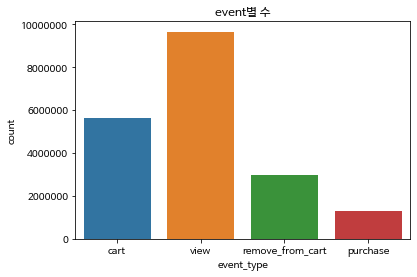

In [ ]:
print(data_total['event_type'].value_counts().sort_index(),"\n")

sns.countplot(x='event_type', data=data_total);
plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
plt.title('event별 수')

plt.show()

### product id

In [ ]:
#프로덕트 id value counts
print(data_total['product_id'].value_counts())
print('\n\n비율로보면\n')
pd.options.display.float_format = '{:.9f}'.format
print(data_total['product_id'].value_counts(normalize=True))

5809910    138812
5809912     53535
5700037     46530
5751383     41713
5751422     41656
            ...  
5547146         1
5547188         1
5687709         1
5711040         1
5616969         1
Name: product_id, Length: 54571, dtype: int64


비율로보면

5809910   0.007088124
5809912   0.002733645
5700037   0.002375950
5751383   0.002129981
5751422   0.002127071
              ...    
5547146   0.000000051
5547188   0.000000051
5687709   0.000000051
5711040   0.000000051
5616969   0.000000051
Name: product_id, Length: 54571, dtype: float64


54571개의 상품이 존재한다. 몇개 품목에 데이터가 모여 있고 몇개 제품에는 데이터 수가 낮은지 확인하고 싶다.

In [ ]:
product_counts = data_total['product_id'].value_counts()
print(product_counts[product_counts==1])  #1번의 데이터만 남긴 상품 : 2647 개
print(product_counts[product_counts<10]) #10번 이하 데이터를 남긴 상품 : 8624 개

5688018    1
5750362    1
5932245    1
5801105    1
5704362    1
          ..
5547146    1
5547188    1
5687709    1
5711040    1
5616969    1
Name: product_id, Length: 2647, dtype: int64
30214      9
5749206    9
5867922    9
5849285    9
5733558    9
          ..
5547146    1
5547188    1
5687709    1
5711040    1
5616969    1
Name: product_id, Length: 8624, dtype: int64


In [ ]:
data_total['product_id'].value_counts().head(20)

5809910    138812
5809912     53535
5700037     46530
5751383     41713
5751422     41656
5854897     41155
5802432     40734
5815662     38881
5849033     36344
5809911     34689
5816170     30907
5877454     29929
5792800     29812
5686925     25281
5649236     24673
5528035     23859
5877456     23673
5856186     23492
5790563     23465
5304        22411
Name: product_id, dtype: int64

상위 상품 20개인데 이게 id이니까 무슨 상품인지도 모르겠고...category 도 id이고...뭔지 알 수 없는게 아쉽네...

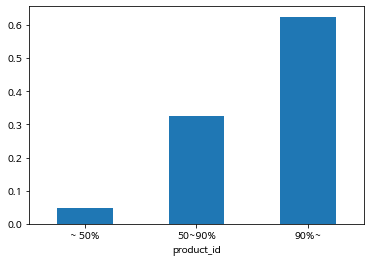

In [ ]:
prob = data_total['product_id'].value_counts()
prob /= prob.sum()
category_classes = pd.qcut(prob, q=[0,.5,.9,1], 
                 labels=['~ 50%', '50~90%','90%~'])
prob_groups = prob.groupby(category_classes).sum()
prob_groups.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

전체 상품수: 54,571 <br>
전체 event 데이터 수: 19,583,742  <br><br>
상위 10% 상품(약 5,500개)이 전체 event 데이터의 60%정도(약 12,000,000개)를 차지하고 <br>
상위 50% 상품(약 27,000개)이 전체 event 데이터의 95%정도(약 18,500,000개), <br>
하위 50% 상품(약 27,000개)은 전체 event 데이터의 5% 정도(약 1,000,000개) 차지하고 있다.<br>

상위 50%의 상품으로 분석하여도 비슷한 결과를 나타낼 것이다.

### category id

In [ ]:
#category id value counts
pd.DataFrame(data_total['category_id'].value_counts())

,category_id
1487580007675986893,997068
1487580005092295511,734335
1487580005595612013,731948
1487580005671109489,627208
1602943681873052386,610877
...,...
1487580013715783889,2
1487580011056595041,1
1487580009706029097,1
1487580010897211483,1


카테고리 수는 525개

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


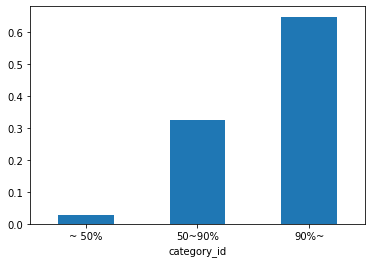

In [ ]:
prob = data_total['category_id'].value_counts()
prob /= prob.sum()
category_classes = pd.qcut(prob, q=[0,.5,.9,1], 
                 labels=['~ 50%', '50~90%','90%~'])
prob_groups = prob.groupby(category_classes).sum()
prob_groups.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [ ]:
prob_groups

category_id
~ 50%     0.029157
50~90%    0.324053
90%~      0.646790
Name: category_id, dtype: float64

In [ ]:
category_counts = data_total['category_id'].value_counts()
print(category_counts[category_counts==1])  # 1번의 데이터만 남긴 카테고리 4개
print(category_counts[category_counts<10])  # 10번 이하 데이터만 남긴 카테고리 19개

1487580011056595041    1
1487580009706029097    1
1487580010897211483    1
1487580009890578479    1
Name: category_id, dtype: int64
1487580005654332272    7
1487580011073372258    7
1487580012658819230    6
1487580011224367209    6
1487580006216369036    6
1487580012231000209    5
1487580013363462335    5
1487580008204469224    4
1487580011140481125    4
1487580012549767321    4
1487580009857024046    4
1487580010024796212    3
1487580007155893175    2
1487580005159404378    2
1487580013715783889    2
1487580011056595041    1
1487580009706029097    1
1487580010897211483    1
1487580009890578479    1
Name: category_id, dtype: int64


In [ ]:
data_total['category_id'].value_counts().head(50)

1487580007675986893    997068
1487580005092295511    734335
1487580005595612013    731948
1487580005671109489    627208
1602943681873052386    610877
1487580006317032337    605291
1487580005268456287    427435
1487580013841613016    386607
1487580005134238553    364988
1487580008246412266    363237
1487580005754995573    339742
1487580009286598681    338155
1487580006300255120    311719
1487580013950664926    283329
1487580009445982239    264497
1487580008145748965    261940
1487580005713052531    245274
1487580005511725929    240928
1487580005427839846    228522
1487580004916134735    227725
2084144451428549153    195740
1487580010100293687    186914
1487580011585077370    186815
1487580005050352469    164572
1487580008263189483    163439
1487580013522845895    161009
1487580006350586771    145812
1487580009051717646    142806
1487580005553668971    142177
2115334439910245200    139923
1487580005461394279    138066
1487580007432717250    134521
1487580009471148064    133302
1638456119

top 50 category<br>
무슨 카테고린지는 알 수 없다...

### product & category

product 가 category 에 일관되게 지정되었는지 확인해본다.

#### 이중 category 된 product 확인

In [ ]:
data_total[['product_id','category_id']].value_counts()

product_id  category_id        
5809910     1602943681873052386    138812
5809912     1602943681873052386     53535
5700037     1487580009286598681     46530
5751383     1487580005092295511     41713
5751422     1487580005268456287     41656
                                    ...  
5739365     1487580005671109489         1
5663270     1487580008447738866         1
5739369     1487580005671109489         1
5852196     1487580005671109489         1
5658888     1487580008800059394         1
Length: 56190, dtype: int64

product 가 54571개 였는데 카테고리와 같이 보니 56190개로 같은 product 가 다른 category에 분류된 데이터가 있는 것 같다.

In [ ]:
df_product_category = pd.DataFrame(data_total[['product_id','category_id']].value_counts()).reset_index()
df_product_category

,product_id,category_id,0
0,5809910,1602943681873052386,138812
1,5809912,1602943681873052386,53535
2,5700037,1487580009286598681,46530
3,5751383,1487580005092295511,41713
4,5751422,1487580005268456287,41656
...,...,...,...
56185,5739365,1487580005671109489,1
56186,5663270,1487580008447738866,1
56187,5739369,1487580005671109489,1
56188,5852196,1487580005671109489,1


In [ ]:
# 일관되게 category 되지 않은 product 데이터들
df_product_category[df_product_category['product_id'].duplicated(keep=False)].sort_values(['product_id'], axis=0)

,product_id,category_id,0
15678,4382,1487580006174425994,252
12260,4382,2196456817758831535,341
223,4497,2195085258272014535,6775
500,4497,1487580006895846315,4302
2739,5524,2196456817641391019,1368
...,...,...,...
54608,5908756,1759024699007828783,1
27058,5908757,1783999063314661546,108
54607,5908757,1759024699007828783,1
18449,5908758,1783999063314661546,204


In [ ]:
# 어떤 카테고리에 이중으로 분류가 많이 되었는지
df_product_category[df_product_category['product_id'].duplicated(keep=False)].sort_values(['product_id'], axis=0)['category_id'].value_counts()

1487580008347075566    602
1487580011383750769    194
1487580008607122425    193
1487580008800059394    193
1933472286753424063    174
                      ... 
1487580006568690590      1
1657722039387029886      1
1487580006132482952      1
1487580006174425994      1
1487580010150625337      1
Name: category_id, Length: 139, dtype: int64

카테고리가 id되어있어서 무엇으로 채워주는 것이 적절한지 판단하기 어렵고 1619개를 모두 검토하는 것도 무리가 있다. count가 많이된 category로 대체하여 채우는 것이 좋겠다.

In [ ]:
highcount_index = df_product_category[df_product_category['product_id'].duplicated(keep='last')].sort_values(['product_id'], axis=0).index
lowcount_index = df_product_category[df_product_category['product_id'].duplicated(keep='first')].sort_values(['product_id'], axis=0).index
# df_product_category['category_id'].iloc[highcount_index].values # 값만 리스트 형태로 입력해주어야 한다.
# df_product_category['category_id'].iloc[lowcount_index]

df_product_category['category_id'].iloc[lowcount_index] = df_product_category['category_id'].iloc[highcount_index].values
df_product_category[df_product_category['product_id'].duplicated(keep=False)].sort_values(['product_id'], axis=0)

,product_id,category_id,0
15678,4382,2196456817758831535,252
12260,4382,2196456817758831535,341
223,4497,2195085258272014535,6775
500,4497,2195085258272014535,4302
2739,5524,2196456817641391019,1368
...,...,...,...
54608,5908756,1783999063314661546,1
27058,5908757,1783999063314661546,108
54607,5908757,1783999063314661546,1
18449,5908758,1783999063314661546,204


category_id 고유값의 수가 바뀌었는지 확인해보자. category_id 고유값 수가 바뀌었다면 카테고리이름이 통합된 것으로 볼 수 있겠다. 원본데이터에도 바꿔준 카테고리를 적용시켜줘야 하는지 생각해봐야한다.

In [ ]:
df_product_category['category_id'].value_counts()

1487580007675986893    3503
1487580013841613016    1864
1487580005595612013    1343
1487580005671109489    1265
1487580008246412266    1176
                       ... 
1805953965678920077       1
1487580011056595041       1
1495705810754339379       1
1487580010075127862       1
1487580011476025461       1
Name: category_id, Length: 517, dtype: int64

525개에서 517개로 8개 줄었다. 139개의 카테고리에서 중복분류가 발견되었는데 생각보다 통합된것은 적은 것 같다.
원본데이터에 merge 하여 적용을 해주어야 겠다.

In [ ]:
# category 변경 후 중복 제거
df_product_category.drop_duplicates(['product_id'],keep='first',inplace=True)
df_product_category

,product_id,category_id,0
0,5809910,1602943681873052386,138812
1,5809912,1602943681873052386,53535
2,5700037,1487580009286598681,46530
3,5751383,1487580005092295511,41713
4,5751422,1487580005268456287,41656
...,...,...,...
56185,5739365,1487580005671109489,1
56186,5663270,1487580008447738866,1
56187,5739369,1487580005671109489,1
56188,5852196,1487580005671109489,1


In [ ]:
# 원본데이터에 product_id 를 기준으로 category_id 덮어씌우기
data_total=pd.merge(data_total,df_product_category[['product_id','category_id']], how='left', on='product_id')
data_total.drop(['category_id_x'], axis=1, inplace=True)
data_total.rename({'category_id_y':'category_id'},axis='columns',inplace=True)
data_total

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id
0,cart,5773203,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,1487580005134238553
1,cart,5773353,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,1487580005134238553
2,cart,5881589,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,2151191071051219817
3,cart,5723490,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,1487580005134238553
4,cart,5881449,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,1487580013522845895
...,...,...,...,...,...,...,...,...,...,...,...
19583737,view,5885416,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,1487580005092295511
19583738,cart,5550686,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,1487580008145748965
19583739,view,5850628,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,1602943681873052386
19583740,view,5716351,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,1487580010872045658


### price

In [ ]:
#price 분포
pd.options.display.float_format = '{:.3f}'.format
data_total['price'].describe()

count   19583742.000
mean           8.740
std           19.764
min          -79.370
25%            2.100
50%            4.110
75%            7.140
max          327.780
Name: price, dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


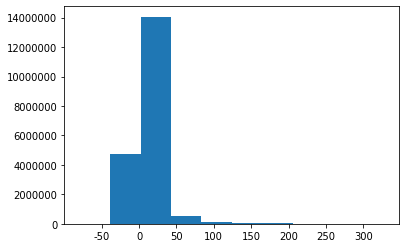

In [ ]:
# 시각화 히스토그램
plt.hist(data_total['price'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("price")
plt.ylabel('count')
plt.show()

단위는 달러이겠지?<br>
데이터의 가격 평균은 8.7,<br>
중간값은 4.1<br>
최대값 327<br>
최소값 -79<br>
음수?
음수데이터 확인해본다.

#### 음수,0 price 확인

In [ ]:
df_price_minus = data_total[data_total['price']<0]
df_price_minus

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id
106709,purchase,5716857,NaN,-23.81,552507528,2019-10-01 19:10:56+00:00,2019-10,Tuesday,1,19,1487580014042939619
187594,purchase,5716855,NaN,-7.94,550375225,2019-10-02 08:30:03+00:00,2019-10,Wednesday,2,8,1487580014042939619
414427,purchase,5716859,NaN,-47.62,555414763,2019-10-03 17:37:04+00:00,2019-10,Thursday,3,17,1487580014042939619
420347,purchase,5670257,NaN,-15.87,556383221,2019-10-03 18:25:39+00:00,2019-10,Thursday,3,18,1487580014042939619
1223877,purchase,5716855,NaN,-7.94,514562574,2019-10-09 14:49:14+00:00,2019-10,Wednesday,9,14,1487580014042939619
...,...,...,...,...,...,...,...,...,...,...,...
19076671,purchase,5716857,NaN,-23.81,561478621,2020-02-26 08:33:10+00:00,2020-02,Wednesday,26,8,1487580014042939619
19472781,purchase,5716855,NaN,-7.94,435867669,2020-02-29 07:15:17+00:00,2020-02,Saturday,29,7,1487580014042939619
19499848,purchase,5716859,NaN,-47.62,621854037,2020-02-29 11:41:09+00:00,2020-02,Saturday,29,11,1487580014042939619
19539777,remove_from_cart,5716857,NaN,-23.81,621914288,2020-02-29 17:10:44+00:00,2020-02,Saturday,29,17,1487580014042939619


가격이 음수인 데이터가 124개인데.. 무엇일까? 특징을 확인해볼까

In [ ]:
print("<월별카운트>\n",df_price_minus['month'].value_counts().sort_index(),sep='')
print("\n<event_type>\n",df_price_minus['event_type'].value_counts(),sep='')

<월별카운트>
2019-10    20
2019-11    16
2019-12    17
2020-01    37
2020-02    34
Name: month, dtype: int64

<event_type>
purchase            119
remove_from_cart      3
view                  2
Name: event_type, dtype: int64


월별 상관은 없는 것 같다.<br>
구매가 많다. <br>
왜 대부분 구매데이터일까? 단순 잘못입력된 데이터일까? 할인을 받아서 낮아진 금액인가? 정확히 알 수 없고 데이터 수가 많지 않으니 제외하도록 한다.

count    124.000000
mean     -31.234355
std       20.636459
min      -79.370000
25%      -47.620000
50%      -23.810000
75%      -15.870000
max       -7.940000
Name: price, dtype: float64 



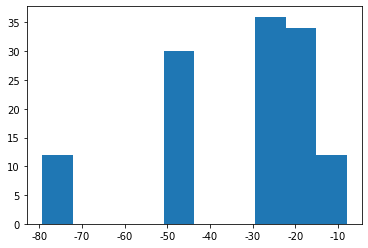

In [ ]:
print(df_price_minus['price'].describe(),"\n")
plt.hist(df_price_minus['price'])
plt.show()

In [ ]:
df_price_zero = data_total[data_total['price']==0]
df_price_zero

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id
2333,view,5892084,NaN,0.000,555458569,2019-10-01 02:05:17+00:00,2019-10,Tuesday,1,2,1597770225539875791
2487,view,5892052,NaN,0.000,555455025,2019-10-01 02:15:41+00:00,2019-10,Tuesday,1,2,1487580010377117763
5382,view,5873432,NaN,0.000,500054739,2019-10-01 04:25:00+00:00,2019-10,Tuesday,1,4,2007399943458784057
5760,view,5882605,NaN,0.000,523154930,2019-10-01 04:33:15+00:00,2019-10,Tuesday,1,4,1487580013522845895
7923,view,5889621,NaN,0.000,523988665,2019-10-01 05:16:30+00:00,2019-10,Tuesday,1,5,1487580010561667147
...,...,...,...,...,...,...,...,...,...,...,...
19582494,cart,5857002,NaN,0.000,505509170,2020-02-29 23:11:45+00:00,2020-02,Saturday,29,23,1487580011098538083
19582495,cart,5859179,NaN,0.000,505509170,2020-02-29 23:11:45+00:00,2020-02,Saturday,29,23,1487580007432717250
19582812,view,5932595,NaN,0.000,562215508,2020-02-29 23:23:16+00:00,2020-02,Saturday,29,23,1487580013950664926
19583085,view,5932595,NaN,0.000,361231992,2020-02-29 23:35:37+00:00,2020-02,Saturday,29,23,1487580013950664926


값이 0원인 데이터가 8만개가 넘는다.. 뭘까? 제외해도 될까? 제외하긴 조금 많아보이는데 이 데이터들의 특징이 있는지 확인해본다.

In [ ]:
print("<월별카운트>\n",df_price_zero['month'].value_counts().sort_index(),sep='')
print("\n<event_type>\n",df_price_zero['event_type'].value_counts(),sep='')

<월별카운트>
2019-10     6026
2019-11    11455
2019-12     7520
2020-01     7513
2020-02    53812
Name: month, dtype: int64

<event_type>
cart                37358
view                30489
remove_from_cart    18478
purchase                1
Name: event_type, dtype: int64


2020년 월에 유난히 많고 구매로 기록된 데이터는 1개뿐이다. 구매기록이 없는 것을 보면 이것도 정상적인 데이터는 아닌 것 같다. 가격을 잘못올린 상품이거나 오류라고 생각하고 제외하도록 한다.

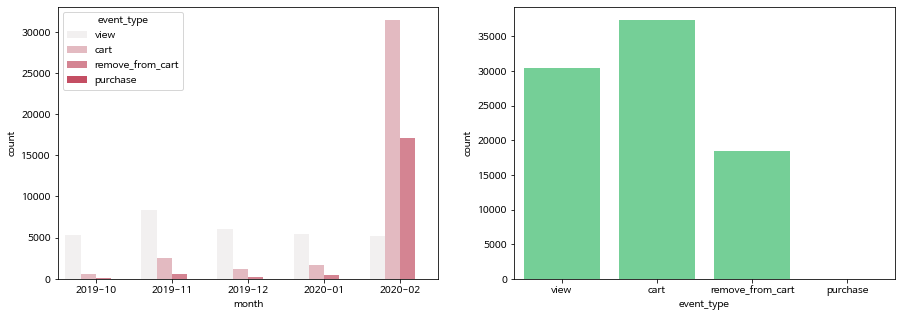

In [ ]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.color_palette("pastel")    # 왜 색이 안변하지?
sns.countplot(x='month', data=df_price_zero, color='#D83A56',hue='event_type');
# plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
# plt.title('월별 event_type 수')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.) # 범례, 그래프 밖으로

plt.subplot(1,2,2)
sns.color_palette("pastel")    # 왜 색이 안변하지?
sns.countplot(x='event_type', data=df_price_zero,color='#66DE93');
# plt.ticklabel_format(style='plain', axis='y') #축 지수표현 변경
# plt.title('월별 event_type 수')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.) # 범례, 그래프 밖으로

plt.draw()

2020년 2월에 zero 데이터가 많아진 이유는 카트에 담고 삭제한 event가 많기 때문이다. 그렇지 않았으면 view가 많았을 것 이다.<br>
2020년 2월에 cart에 많이 담겼던 제품이 특정제품일까?

In [ ]:
df_price_zero[df_price_zero['month']=='2020-02']

,event_type,product_id,category_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour
16536331,view,5924482,1487580013950664926,NaN,0.000000000,579927966,2020-02-01 00:12:40+00:00,2020-02,Saturday,1,0
16536620,view,5924351,1487580007675986893,NaN,0.000000000,608825093,2020-02-01 00:31:17+00:00,2020-02,Saturday,1,0
16536633,view,5924330,1487580007675986893,NaN,0.000000000,608825093,2020-02-01 00:32:01+00:00,2020-02,Saturday,1,0
16536971,view,5924357,2235524499216793855,NaN,0.000000000,564304057,2020-02-01 00:53:06+00:00,2020-02,Saturday,1,0
16537067,cart,5924326,1487580007675986893,NaN,0.000000000,605934388,2020-02-01 00:58:46+00:00,2020-02,Saturday,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20691530,cart,5857002,1487580011098538083,NaN,0.000000000,505509170,2020-02-29 23:11:45+00:00,2020-02,Saturday,29,23
20691531,cart,5859179,1487580007432717250,NaN,0.000000000,505509170,2020-02-29 23:11:45+00:00,2020-02,Saturday,29,23
20691861,view,5932595,1487580013950664926,NaN,0.000000000,562215508,2020-02-29 23:23:16+00:00,2020-02,Saturday,29,23
20692148,view,5932595,1487580013950664926,NaN,0.000000000,361231992,2020-02-29 23:35:37+00:00,2020-02,Saturday,29,23


In [ ]:
print("product_id value counts : \n\n",df_price_zero[df_price_zero['month']=='2020-02']['product_id'].value_counts(),'\n\n',sep='')
print("category_id value counts : \n\n",df_price_zero[df_price_zero['month']=='2020-02']['category_id'].value_counts(),'\n\n',sep='')
print("user_id value counts : \n\n",df_price_zero[df_price_zero['month']=='2020-02']['user_id'].value_counts(),'\n\n',sep='')


product_id value counts : 

5924418    120
5932595     92
5773605     72
5849033     62
5700037     57
          ... 
5765221      1
5821207      1
5894931      1
5890150      1
5898240      1
Name: product_id, Length: 17695, dtype: int64


category_id value counts : 

1487580007675986893    4793
1487580005671109489    2299
1487580006317032337    1995
1487580011585077370    1961
1487580005134238553    1807
                       ... 
1487580009026551821       1
1487580013086638258       1
2053031020655018687       1
1842735768846467167       1
1487580010695884882       1
Name: category_id, Length: 387, dtype: int64


user_id value counts : 

419558969    4604
497593427    2383
445777038    1991
454177715    1960
476875829    1169
             ... 
272301065       1
554017407       1
616468013       1
616866527       1
620749907       1
Name: user_id, Length: 3383, dtype: int64




0원 제품 데이터는 특정제품에 몰린 현상은 아닌 것 같다.

#### 음수,0 price 처리

In [ ]:
data_total

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id
0,cart,5773203,runail,2.620,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,1487580005134238553
1,cart,5773353,runail,2.620,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,1487580005134238553
2,cart,5881589,lovely,13.480,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,2151191071051219817
3,cart,5723490,runail,2.620,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,1487580005134238553
4,cart,5881449,lovely,0.560,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,1487580013522845895
...,...,...,...,...,...,...,...,...,...,...,...
19583737,view,5885416,grattol,6.270,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,1487580005092295511
19583738,cart,5550686,NaN,1.110,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,1487580008145748965
19583739,view,5850628,grattol,5.240,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,1602943681873052386
19583740,view,5716351,irisk,0.790,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,1487580010872045658


In [ ]:
data_total.drop(data_total.loc[data_total['price']<=0].index, inplace=True)
data_total

,event_type,product_id,category_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour
0,cart,5773203,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0
1,cart,5773353,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0
2,cart,5881589,2151191071051219817,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0
3,cart,5723490,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0
4,cart,5881449,1487580013522845895,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20692835,view,5885416,1487580005092295511,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23
20692836,cart,5550686,1487580008145748965,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23
20692837,view,5850628,1602943681873052386,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23
20692838,view,5716351,1487580010872045658,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23


원래 데이터 수 : 19,583,742<br>
0,음수 값 수 : 86,450<br>
19,583,742 - 86,450 = 19,497,292

### user id

In [ ]:
#user id value counts
data_total['user_id'].value_counts()

527021202    21827
557616099     9782
583884978     9391
557956487     7681
550388516     7456
             ...  
550301868        1
609345514        1
609279946        1
605067203        1
608188409        1
Name: user_id, Length: 1637977, dtype: int64

event를 남긴 유저수는 163만명, 평균으로 보면 한 사람당 약 12개의 기록을 남긴 것이지만 실제로는 일부유저에게 몰려있다.<br>
한번만 이용한 사람부터 26098 개의 데이터를 남긴 사용자까지..ㄷㄷ<br>
고객을 그룹화 하여 타겟을 세분화할 수 있을까? heavy user를 구분하고 다른 분석을 보이는지 확인하고 다른 전략을 세울 수 있다.

In [ ]:
# 월별 사용자 수

data_total.groupby('month')['user_id'].nunique()


,user_id
month,
2019-10,399396
2019-11,368029
2019-12,369760
2020-01,409671
2020-02,390621


In [ ]:
user_counts = data_total['user_id'].value_counts()
print(user_counts[user_counts==1])   # 1번의 데이터만 남긴 유저 : 769,703명
print(user_counts[user_counts<10])  # 10번 이하 데이터만 남긴 유저 : 1,391,855명

564020205    1
580016296    1
601560278    1
596004561    1
539348934    1
            ..
550301868    1
609345514    1
609279946    1
605067203    1
608188409    1
Name: user_id, Length: 769085, dtype: int64
316248476    9
568651650    9
598728948    9
599362821    9
539635771    9
            ..
550301868    1
609345514    1
609279946    1
605067203    1
608188409    1
Name: user_id, Length: 1390769, dtype: int64


5달 동안 10번 이하의 기록을 남긴 유저가 139만 명 정도이다. 대부분은 해당 쇼핑몰을 자주 이용한다고 보기 어렵다.

user_id
~ 50%    0.063818600
50~70%   0.041299513
70~80%   0.022653485
80~90%   0.084706692
90~95%   0.118639941
95%~     0.668881769
Name: user_id, dtype: float64


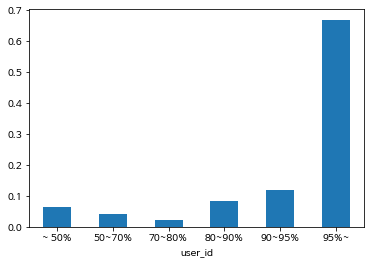

In [ ]:
prob = data_total['user_id'].value_counts()
prob /= prob.sum()
category_classes = pd.qcut(prob, q=[0,.5,.7,.8,.9,.95,1], 
                 labels=['~ 50%','50~70%','70~80%','80~90%','90~95%','95%~'])
prob_groups = prob.groupby(category_classes).sum()
print(prob_groups)
prob_groups.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

사용횟수 상위 5% 유저 데이터 : 67% <br>
사용횟수 상위 10% 유저 데이터 : 78%<br>
사용횟수 상위 20% 유저 데이터 : 87%<br>

=> 상위 사용자들이 나머지 사용자들과의 사용횟수 외에 가격대, 카테고리 등의 차이를 보이면 그에 맞는 전략을 별도로 세우는 것이 좋겠다.

헤비유저를 구분하기 위해 클러스터링 해본다. 적당한 클러스터링 하기위해 k-means clustering 을 이용해본다.

#### user clustering

중복제거된 user id 와 count로 이루어진 데이터 프레임을 만들고 클러스터링 한 후 라벨링 한 값을 기존 데이터 프레임에 merge 해준다.

In [ ]:
df_user_counts = pd.DataFrame(user_counts)
df_user_counts.rename({'user_id':'count'},axis='columns',inplace=True)
df_user_counts

,count
527021202,21827
557616099,9782
583884978,9391
557956487,7681
550388516,7456
...,...
550301868,1
609345514,1
609279946,1
605067203,1


##### n_clusters = 2

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_user_counts)
df_user_counts['label']= kmeans.labels_
print(df_user_counts['label'].value_counts(),"\n")
print(df_user_counts['label'].value_counts(normalize=True),"\n")
print(df_user_counts.groupby('label').sum(),"\n")
print(df_user_counts.groupby('label').sum()[['count']] / sum(df_user_counts.groupby('label').sum()['count']))

df_user_counts.sort_values('count',inplace=True)

0    1629401
1       8576
Name: label, dtype: int64 

0    0.994764
1    0.005236
Name: label, dtype: float64 

          count
label          
0      14271711
1       5225581 

          count
label          
0      0.731984
1      0.268016


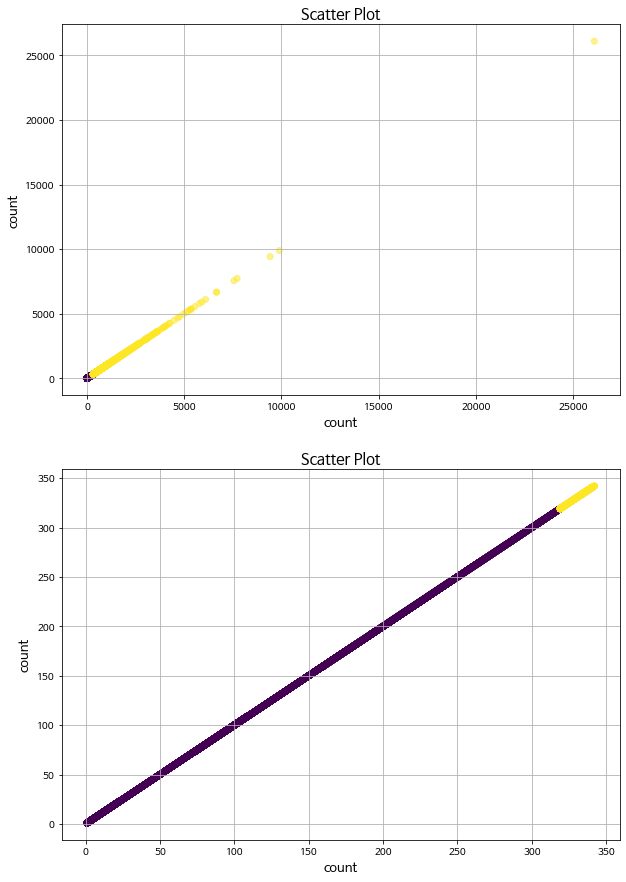

In [ ]:
fig = plt.figure(figsize=(10,15))
top = fig.add_subplot(2,1,1)

plt.title("Scatter Plot", fontsize=15)
plt.scatter(df_user_counts["count"], df_user_counts["count"], c=df_user_counts['label'], alpha=.5)
plt.xlabel("count", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.grid()

top = fig.add_subplot(2,1,2)
plt.title("Scatter Plot", fontsize=15)
top_Left = 1
top_Right = 1632000
plt.scatter(df_user_counts["count"][top_Left:top_Right], df_user_counts["count"][top_Left:top_Right], c=df_user_counts['label'][top_Left:top_Right], alpha=.5)
plt.xlabel("count", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.grid()
plt.show()

user id를 데이터 횟수를 기준으로 2개의 클러스터로 구분하였다. <br>label 0은 일반,낮은이용 사용자이고,<br> label 1은 많이 이용하는 사용자 이다.<br>
<br>
유저의 수는 일반사용자 1,629,401명 heavy user 8,576명으로 구분되었다. 비율로 보면 heavy user가 0.5% 뿐인 걸 알 수 있다. 데이터 수는 0.5%가 전체 26% 데이터를 차지하고 있다. 5달동안 약 300번 이상의 데이터를 남긴 유저들을 heavy user로 구분하였다. 매일 평균 2번의 기록을 남긴 것으로 생각해볼 수 있는데 적절한 구분이라고 생각된다. 25,000 이상의 기록을 남긴 유저 때문에 더 상위퍼센트로 구분이 되는 영향을 주었을 수 있으니 3개로 나누어서 값을 비교해 봐야겠다.


##### n_clusters = 3

In [ ]:
df_user_counts

,count
527021202,21827
557616099,9782
583884978,9391
557956487,7681
550388516,7456
...,...
550301868,1
609345514,1
609279946,1
605067203,1


In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_user_counts)
df_user_counts['label_2']= kmeans.labels_
print(df_user_counts['label_2'].value_counts(),"\n")
print(df_user_counts['label_2'].value_counts(normalize=True),"\n")
print(df_user_counts.groupby('label_2').sum(),"\n")
print(df_user_counts.groupby('label_2').sum()[['count']] / sum(df_user_counts.groupby('label_2').sum()['count']))
df_user_counts.sort_values('count',inplace=True)

1    1616527
0      20410
2       1040
Name: label_2, dtype: int64 

1    0.986905
0    0.012460
2    0.000635
Name: label_2, dtype: float64 

            count
label_2          
0         6463630
1        11444040
2         1589622 

            count
label_2          
0        0.331514
1        0.586955
2        0.081530


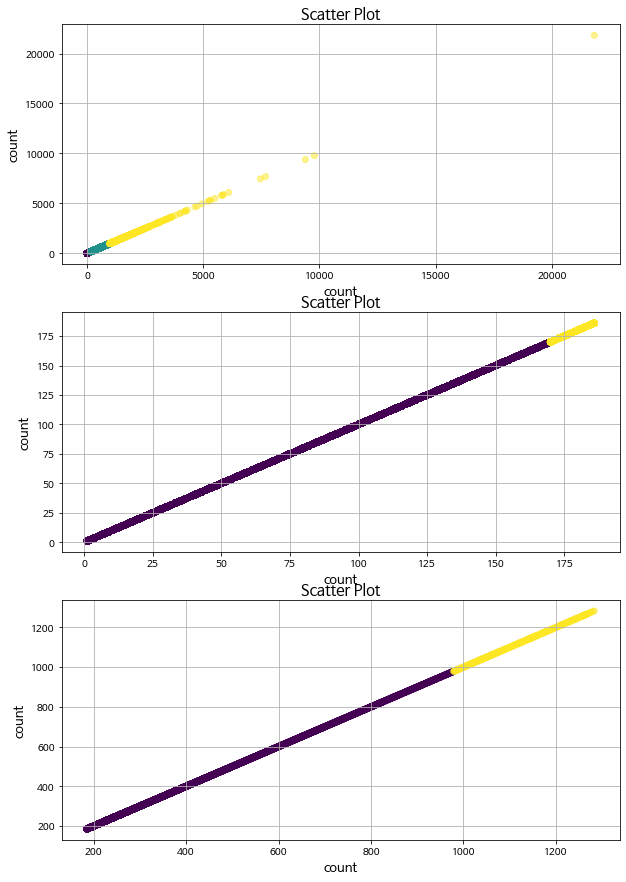

In [ ]:
fig = plt.figure(figsize=(10,15))
top = fig.add_subplot(3,1,1)

plt.title("Scatter Plot", fontsize=15)
plt.scatter(df_user_counts["count"], df_user_counts["count"], c=df_user_counts['label_2'], alpha=.5)
plt.xlabel("count", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.grid()

top = fig.add_subplot(3,1,2)
plt.title("Scatter Plot", fontsize=15)
top_Left = 1
top_Right = 1620000
plt.scatter(df_user_counts["count"][top_Left:top_Right], df_user_counts["count"][top_Left:top_Right], c=df_user_counts['label_2'][top_Left:top_Right], alpha=.5)
plt.xlabel("count", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.grid()

top = fig.add_subplot(3,1,3)
plt.title("Scatter Plot", fontsize=15)
top_Left = 1620000
top_Right = 1637500
plt.scatter(df_user_counts["count"][top_Left:top_Right], df_user_counts["count"][top_Left:top_Right], c=df_user_counts['label_2'][top_Left:top_Right], alpha=.5)
plt.xlabel("count", fontsize=13)
plt.ylabel("count", fontsize=13)
plt.grid()

plt.show()

3개의 클러스터로 구분하니  <br>가장 많이 이용하는 첫번째 그룹에 들어간 유저는 892명  <br>그 다음 그룹에 19,330명  <br>마지막 그룹에 나머지 1,617,755명이 구분되었다.  <br>첫번째, 두번째 그룹의 유저수를 합쳐도 전체의 1%를 겨우 넘을 정도의 수이다.  <br>데이터는 전체의 40% 가까이 차지하고 있다. 
<br><br>
그룹이 나뉘어진 경계의 count를 보면 첫번째 그룹은 거의 1000번이고, 두번째 그룹은 170번 정도 된다. <br>첫번째 그룹은 5달동안의 데이터라고 생각했을 때 확실히 쇼핑몰을 자주 이용하는 고객임이 분명하고, <br>두번째 그룹은 170번은 많이 사용하긴 하지만 약간은 애매하게 느껴진다. <br>2개의 클러스터로 나뉘었을때 경계인 300번정도가 적당하게 보인다.


#### label merge

In [ ]:
data_total

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id
0,cart,5773203,runail,2.620,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,1487580005134238553
1,cart,5773353,runail,2.620,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,1487580005134238553
2,cart,5881589,lovely,13.480,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,2151191071051219817
3,cart,5723490,runail,2.620,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,1487580005134238553
4,cart,5881449,lovely,0.560,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,1487580013522845895
...,...,...,...,...,...,...,...,...,...,...,...
19583737,view,5885416,grattol,6.270,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,1487580005092295511
19583738,cart,5550686,NaN,1.110,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,1487580008145748965
19583739,view,5850628,grattol,5.240,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,1602943681873052386
19583740,view,5716351,irisk,0.790,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,1487580010872045658


In [ ]:
# merge
df_user_counts.reset_index(drop=False, inplace=True)
df_user_counts.rename({'index':'user_id'},axis='columns',inplace=True)
data_total=pd.merge(data_total,df_user_counts, how='left', on='user_id')
data_total

,event_type,product_id,category_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,count,label,label_2
0,cart,5773203,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,27,0,1
1,cart,5773353,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,27,0,1
2,cart,5881589,2151191071051219817,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,110,0,1
3,cart,5723490,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,27,0,1
4,cart,5881449,1487580013522845895,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,110,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497287,view,5885416,1487580005092295511,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,42,0,1
19497288,cart,5550686,1487580008145748965,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,926,1,2
19497289,view,5850628,1602943681873052386,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,3,0,1
19497290,view,5716351,1487580010872045658,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,3,0,1


In [ ]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19497292 entries, 0 to 19497291
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_type    object 
 1   product_id    int64  
 2   brand         object 
 3   price         float64
 4   user_id       int64  
 5   event_time_2  object 
 6   month         object 
 7   day_of_week   object 
 8   day           int64  
 9   hour          int64  
 10  category_id   int64  
 11  count         int64  
 12  label         int32  
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 2.0+ GB


In [ ]:
data_total.to_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data_total.csv',index=False) # 전처리한 것 저장

## (전처리한 것 불러오기)


feature list

- event_type : 발생 데이터 타입
- product_id : 상품 id
- category_id	:상품 카테고리 id
- brand	:상품 브랜드
- price	: 상품 가격
- user_id	: 유저 id
- event_time_2 : 연,월,일,시간	
- month	: 월
- day_of_week	: 요일
- day	: 일
- hour : 시간
- count	: 해당유저의 5달동안 발생 데이터 건수
- label : 유저 cluster 라벨


In [ ]:
data_total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/codestates_AI_bootcamp/개인프로젝트/data_total.csv')
data_total

,event_type,product_id,category_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,count,label,label_2
0,cart,5773203,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,27,0,1
1,cart,5773353,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,27,0,1
2,cart,5881589,2151191071051219817,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,110,0,1
3,cart,5723490,1487580005134238553,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,27,0,1
4,cart,5881449,1487580013522845895,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,110,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497287,view,5885416,1487580005092295511,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,42,0,1
19497288,cart,5550686,1487580008145748965,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,926,1,2
19497289,view,5850628,1602943681873052386,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,3,0,1
19497290,view,5716351,1487580010872045658,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,3,0,1


# 분석

## 헤비유저와 일반유저

### 2개로 나눈 경우

#### 구매가격대 차이

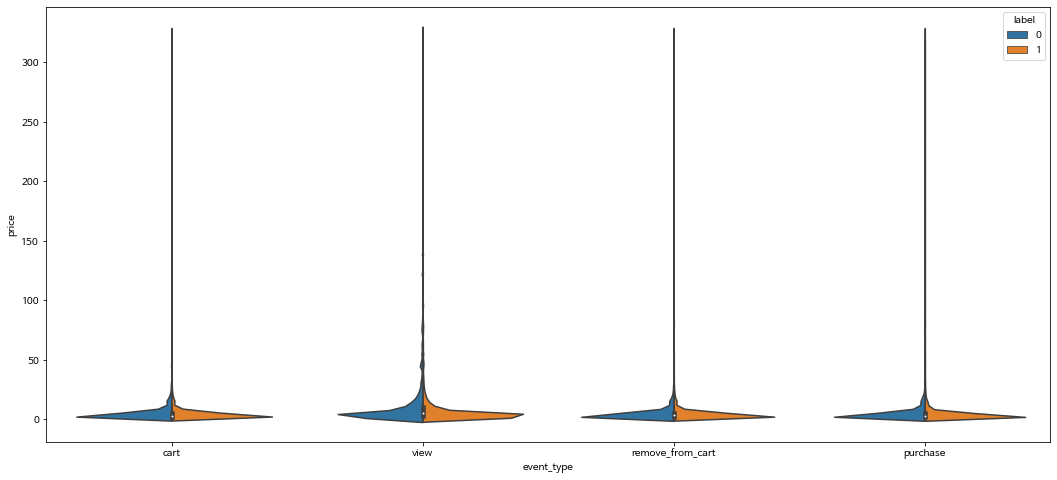

In [ ]:
# 헤비유저와 일반유저의 구매가격대 차이 시각화

plt.figure(figsize=(18,8))
sns.violinplot(x='event_type', y="price", data=data_total,hue='label', split=True)

In [ ]:
# 헤비유저, 일반유저 결제가격 분석
data_total[data_total['event_type']=='purchase'].groupby('label').describe()['price']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,933904.0,5.196152,9.309371,0.05,1.59,3.16,5.56,327.78
1,352078.0,4.247811,7.745878,0.05,1.43,2.81,4.92,317.46


In [ ]:
# 헤비유저, 일반유저 결제가격 분석
data_total.groupby(['event_type','label'])['price'].agg(['size', 'mean', 'std', 'min', 'max'])

size       mean        std   min     max
event_type       label                                             
cart             0      4040127   5.568652  11.173463  0.05  327.78
                 1      1575506   4.457696   8.733307  0.05  327.78
purchase         0       933904   5.196152   9.309371  0.05  327.78
                 1       352078   4.247811   7.745878  0.05  317.46
remove_from_cart 0      1780244   5.709130  11.180459  0.05  327.78
                 1      1189134   4.713294   9.096209  0.05  327.78
view             0      7517436  13.584024  27.157039  0.05  327.78
                 1      2108863   8.255389  18.859984  0.05  327.78

event_type별 분석에서 최댓값,최솟값 데이터는 의미가 없다. 프로세스가 view-cart-purchase 이면 purchase 하기 위해 view와 cart를 거쳐야하기 때문이다.<br>
purchase 에서 유저 라벨별로 값을 비교해보면 헤비유저가 구매하는 평균금액대가 낮은 것을 알 수 있다. 표준편차도 작다. 쇼핑몰을 자주 사용하는 사람들이 높은 가격대의 상품을 구매한다기보다 저렴한 가격의 상품들을 구매하는 횟수가 많다는 것을 알 수 있다. 이것은 절며한 가격의 상품의 분포가 압도적으로 많기 때문에 횟수가 늘어날 수록 전체 가격의 평균으로 수렴하는 것으로 생각해볼 수 있다 반면에 가끔 구매한 사람들의 평균 가격대는 평균과 편차를 보이고 비교적 높은 가격대의 평균을 나타낼 확률이 높다고 생각된다.

그렇다면 헤비유저와 일반유저의 구매 금액대의 차이가 있다고 볼수 있는가?

In [ ]:
# 헤비 유저의 구매가격 데이터
print("헤비 유저의 구매가격 데이터:\n",data_total[data_total['label']==1]['price'],sep='')
# 일반 유저의 구매가격 데이터
print("일반 유저의 구매가격 데이터:\n",data_total[data_total['label']==0]['price'],sep='')

헤비 유저의 구매가격 데이터:
73          11.43
104         11.43
111          7.94
147          7.14
153          3.00
            ...  
19497277     4.44
19497279     1.59
19497282     3.00
19497286     1.59
19497288     1.11
Name: price, Length: 5225581, dtype: float64
일반 유저의 구매가격 데이터:
0            2.62
1            2.62
2           13.48
3            2.62
4            0.56
            ...  
19497285     0.79
19497287     6.27
19497289     5.24
19497290     0.79
19497291     3.17
Name: price, Length: 14271711, dtype: float64


In [ ]:
# 가설 검정 
data_1 = data_total[data_total['label']==1]['price']
data_0 = data_total[data_total['label']==0]['price']
scipy.stats.ttest_ind(data_1, data_0, equal_var=False)


Ttest_indResult(statistic=-450.7219607746751, pvalue=0.0)

#### 구매건당 품목수, 결제금액 차이

In [ ]:
# 한번에 한가지의 상품만 구입하는 것이 아니다.
# 한 유저가 같은 시점에 한번에 몇가지 상품을 구매했는지 확인해보자
data_total[data_total['event_type']=='purchase'].groupby(['event_time_2','user_id']).count()[['event_type']]   # 결측값이 없는 event_type로 count

,,event_type
event_time_2,user_id,
2019-10-01 00:06:35+00:00,474232307,10
2019-10-01 00:10:30+00:00,543446752,35
2019-10-01 00:12:50+00:00,463240011,19
2019-10-01 00:18:22+00:00,550021912,2
2019-10-01 00:19:17+00:00,250032160,46
...,...,...
2020-02-29 23:26:42+00:00,610361057,1
2020-02-29 23:30:29+00:00,359752159,1
2020-02-29 23:34:13+00:00,573069575,1


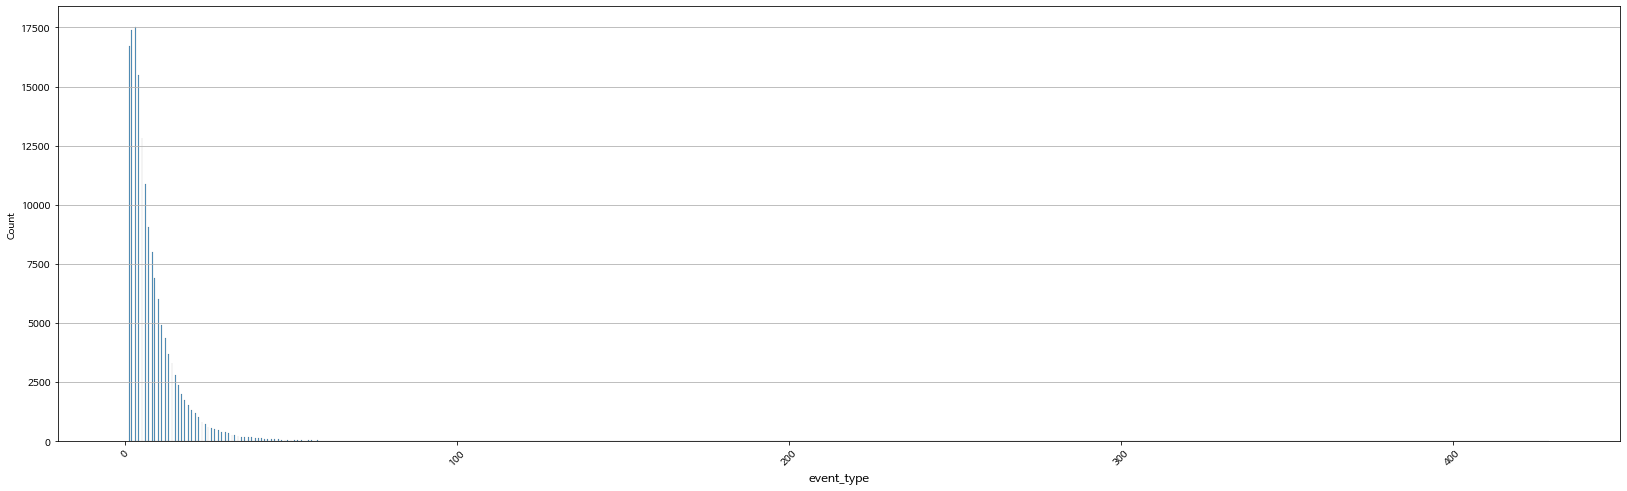

In [ ]:
# 건당 구매품목수 분포 시각화

plt.figure(figsize=(28,8))
plt.xticks(rotation=45)


plt.grid(axis='y')
plt.xlabel("event_type", fontsize=12)

sns.histplot(data=data_total[data_total['event_type']=='purchase'].groupby(['event_time_2','user_id']).count()[['event_type']], x="event_type", shrink=1)

In [ ]:
# 건당 구매품목수 분석
data_total[data_total['event_type']=='purchase'].groupby(['event_time_2','user_id']).count()[['event_type']].describe()

,event_type
count,159376.000000
mean,8.068856
std,9.102100
min,1.000000
25%,3.000000
50%,5.000000
75%,10.000000
max,429.000000


평균적으로 8개를 구매한다. 한번에 429가지 상품을 구매한 사람이 있다는 것이 놀랍네.. <br>헤비유저와 일반유저로 구분하고 구매총액도 확인해보자.

In [ ]:
# 일반유저가 한번 구매할 때 구매하는 상품수와 금액
data_total[(data_total['event_type']=='purchase')&(data_total['label']==0)].groupby(['event_time_2','user_id'])['price'].agg(['count','sum']).describe()

,count,sum
count,133377.000000,133377.000000
mean,7.001987,36.383387
std,7.100879,37.172658
min,1.000000,0.130000
25%,3.000000,14.410000
50%,5.000000,26.030000
75%,9.000000,45.580000
max,219.000000,1456.550000


In [ ]:
# 헤비유저가 한번 구매할 때 구매하는 상품수와 금액
data_total[(data_total['event_type']=='purchase')&(data_total['label']==1)].groupby(['event_time_2','user_id'])['price'].agg(['count','sum']).describe()

,count,sum
count,25999.000000,25999.000000
mean,13.541982,57.523776
std,14.608481,62.733085
min,1.000000,0.320000
25%,6.000000,24.715000
50%,10.000000,43.530000
75%,17.000000,67.070000
max,429.000000,1729.590000


헤비 유저들이 한번에 더 많은 상품을 구매한다. 앞에서 헤비유저들이 구매하는 상품들의 가격대가 더 낮은 것을 알 수 있었는데, 한번에 구매하는 상품수가 많기 때문에 구매총액은 높은 것을 알수 있다.


In [ ]:
#  가설 검정
data_1 = data_total[(data_total['event_type']=='purchase')&(data_total['label']==1)].groupby(['event_time_2','user_id'])['price'].agg(['count'])['count']
data_0 = data_total[(data_total['event_type']=='purchase')&(data_total['label']==0)].groupby(['event_time_2','user_id'])['price'].agg(['count'])['count']

scipy.stats.ttest_ind(data_1, data_0, equal_var=False)

Ttest_indResult(statistic=70.57862033594753, pvalue=0.0)

In [ ]:
#  가설 검정
data_1 = data_total[(data_total['event_type']=='purchase')&(data_total['label']==1)].groupby(['event_time_2','user_id'])['price'].agg(['sum'])['sum']
data_0 = data_total[(data_total['event_type']=='purchase')&(data_total['label']==0)].groupby(['event_time_2','user_id'])['price'].agg(['sum'])['sum']

scipy.stats.ttest_ind(data_1, data_0, equal_var=False)

Ttest_indResult(statistic=52.56769518641344, pvalue=0.0)

### 3개로 나눈 경우

#### 구매가격대 차이

In [ ]:
# 헤비유저, 중간헤비유저, 일반유저 결제가격 분석
data_total.groupby(['event_type','label_2'])['price'].agg(['size', 'mean', 'std', 'min', 'max'])

size       mean        std   min     max
event_type       label_2                                             
cart             0        2010589   4.482735   8.746440  0.05  327.78
                 1        3149083   5.853681  11.690609  0.05  327.78
                 2         455961   4.549785   9.273003  0.05  327.78
purchase         0         522980   4.284314   7.575022  0.05  327.78
                 1         687972   5.505912   9.808900  0.05  327.78
                 2          75030   4.261552   8.646029  0.05  299.81
remove_from_cart 0        1364067   4.817060   9.290690  0.05  327.78
                 1        1214949   6.065964  11.846158  0.05  327.78
                 2         390362   4.682202   9.084412  0.05  327.78
view             0        2565994   8.483705  18.965699  0.05  327.78
                 1        6392036  14.430167  28.220610  0.05  327.78
                 2         668269   8.258994  19.351437  0.05  327.78

In [ ]:
# 가설 검정 
data_2 = data_total[data_total['label_2']==2]['price']
data_1 = data_total[data_total['label_2']==1]['price']
data_0 = data_total[data_total['label_2']==0]['price']
print('헤비유저,중간헤비유저 구매가격대 차이:', scipy.stats.ttest_ind(data_2, data_1, equal_var=False))
print('중간헤비유저, 일반유저 구매가격대 차이:', scipy.stats.ttest_ind(data_1, data_0, equal_var=False))


헤비유저,중간헤비유저 구매가격대 차이: Ttest_indResult(statistic=-339.4291462673254, pvalue=0.0)
중간헤비유저, 일반유저 구매가격대 차이: Ttest_indResult(statistic=520.4536654005309, pvalue=0.0)


#### 구매건당 품목수, 결제금액 차이

In [ ]:
#  가설 검정
data_2 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==2)].groupby(['event_time_2','user_id'])['price'].agg(['count'])['count']
data_1 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==1)].groupby(['event_time_2','user_id'])['price'].agg(['count'])['count']
data_0 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==0)].groupby(['event_time_2','user_id'])['price'].agg(['count'])['count']

print('헤비유저,중간헤비유저 구매건당 품목수 차이:', scipy.stats.ttest_ind(data_2, data_1, equal_var=False))
print('중간헤비유저, 일반유저 구매건당 품목수 차이:', scipy.stats.ttest_ind(data_1, data_0, equal_var=False))

헤비유저,중간헤비유저 구매건당 품목수 차이: Ttest_indResult(statistic=31.1072144976136, pvalue=4.9956017902729e-196)
중간헤비유저, 일반유저 구매건당 품목수 차이: Ttest_indResult(statistic=-104.2902291615785, pvalue=0.0)


In [ ]:
#  가설 검정
data_2 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==2)].groupby(['event_time_2','user_id'])['price'].agg(['sum'])['sum']
data_1 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==1)].groupby(['event_time_2','user_id'])['price'].agg(['sum'])['sum']
data_0 = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==0)].groupby(['event_time_2','user_id'])['price'].agg(['sum'])['sum']

print('헤비유저,중간헤비유저 구매건당 결제금액 차이:', scipy.stats.ttest_ind(data_2, data_1, equal_var=False))
print('중간헤비유저, 일반유저 구매건당 결제금액 차이:', scipy.stats.ttest_ind(data_1, data_0, equal_var=False))

헤비유저,중간헤비유저 구매건당 결제금액 차이: Ttest_indResult(statistic=25.06878239588911, pvalue=1.4266620350011337e-131)
중간헤비유저, 일반유저 구매건당 결제금액 차이: Ttest_indResult(statistic=-70.38833386116633, pvalue=0.0)


## 카테고리 분석

### 월별 카테고리 데이터 분석

In [ ]:
df = pd.DataFrame(data_total['category_id'].value_counts())
df = df[df['category_id']>1000]
df.reset_index(inplace=True)
df.rename({'category_id':'c_count','index':'category_id'},axis='columns',inplace=True)
df

,category_id,c_count
0,1487580007675986893,981363
1,1487580005092295511,732820
2,1487580005595612013,730330
3,1487580005671109489,624601
4,1602943681873052386,609974
...,...,...
403,2154396123597373922,1225
404,1487580006820348840,1191
405,1487580006711296933,1190
406,1487580011031429216,1166


In [ ]:
# 월별 카테고리 데이터 수
category_count = pd.DataFrame(data_total.groupby('month')['category_id'].value_counts().sort_index())
category_count.rename({'category_id':'c_count'},axis='columns',inplace=True)
category_count.reset_index(inplace=True)
category_count

category_count = df[['category_id']].merge(category_count,how='left',on='category_id') #1000이하 카테고리 제거
category_count = category_count[['month','category_id','c_count']]
category_count.sort_values(by='month',inplace=True)
category_count = category_count[category_count['c_count']>100] # 한달 100건 이하도 제거
category_count

,month,category_id,c_count
0,2019-10,1487580007675986893,185475
370,2019-10,1487580008313521133,14322
1787,2019-10,1487580013992607968,527
889,2019-10,1487580011408916594,7873
365,2019-10,1487580007306888126,12444
...,...,...,...
1575,2020-02,2106514244437541443,875
788,2020-02,1487580007592100809,2869
793,2020-02,1487580012642042013,4377
1593,2020-02,2130081478220972046,856


In [ ]:
plt.figure(figsize=(12,8))
fig = px.line(category_count, x='month', y='c_count',color='category_id',title='시간에 따른 카테고리별 데이터 수 변화',width=1800, height=1000)
fig.show()

<Figure size 864x576 with 0 Axes>

카테고리로 그려보더라도 종류가 500개가 넘어서 다 확인하기가 어렵지만, 기울기가 두드러지는 것은 발견할 수 있다. plotly 로 notation 확인이 가능하고 월별로 변화를 많이 보인 category_id를 확인할 수 있다. 전체 데이터아닌 매출액에 대한 데이터도 확인해본다.
월별 변화량에 비해 각 카테고리의 변화량을 비교하여 상대적으로 많이 감소하거나 증가한 것을 판별할 수 있을 것 같다.
지속적인 하락세, 증가세를 보이는 카테고리도 찾아보자.

카테고리별로 가격대가 다를 수 있고 비싼 카테고리는 매출건수가 많지 않아도 매출액이 높을 수 있다. 매출건수와 매출액수를 같이 비교해봐야겠다.

In [ ]:
# 월별 카테고리별 매출건, 매출액
category_sales = pd.DataFrame(data_total[data_total['event_type']=='purchase'].groupby(['month','category_id'])['price'].agg(['count','sum']))
category_sales.reset_index(inplace=True)
category_sales

category_sales = df[['category_id']].merge(category_sales,how='left',on='category_id') #1000이하 카테고리 제거
category_sales = category_sales[['month','category_id','count','sum']]
category_sales.sort_values(by='month',inplace=True)
category_sales = category_sales[category_sales['count']>100] # 한달 100건 이하도 제거
category_sales

,month,category_id,count,sum
0,2019-10,1487580007675986893,14510.0,18492.62
852,2019-10,1783999076551885399,141.0,801.92
857,2019-10,1487580006644188066,612.0,2870.52
861,2019-10,1977575787259232875,235.0,787.14
866,2019-10,2151191070908613477,282.0,902.59
...,...,...,...,...
681,2020-02,1487580013027917999,596.0,2432.76
254,2020-02,1783999072332415142,762.0,10432.98
686,2020-02,2151191071118328683,518.0,1097.76
109,2020-02,1487580010100293687,3663.0,9618.30


In [ ]:
plt.figure(figsize=(12,8))
fig = px.line(category_sales, x='month', y='sum',color='category_id',title='시간에 따른 카테고리별 매출액 변화',width=1800, height=1000)
fig.show()

<Figure size 864x576 with 0 Axes>

In [ ]:
# 월별 카테고리별 매출건 시각화
plt.figure(figsize=(12,8))
fig = px.line(category_sales, x='month', y='count',color='category_id',title='시간에 따른 카테고리별 매출건수 변화',width=1800, height=1000)
fig.show()

<Figure size 864x576 with 0 Axes>

### 카테고리 전월대비 증감률 계산

In [ ]:
# 카테고리 증감률 계산

# 증감률 컬럼 추가

category_sales['count_MoM']=""
category_sales['sum_MoM']=""
category_sales

,month,category_id,count,sum,count_MoM,sum_MoM
0,2019-10,1487580007675986893,14510.0,18492.62,,
852,2019-10,1783999076551885399,141.0,801.92,,
857,2019-10,1487580006644188066,612.0,2870.52,,
861,2019-10,1977575787259232875,235.0,787.14,,
866,2019-10,2151191070908613477,282.0,902.59,,
...,...,...,...,...,...,...
681,2020-02,1487580013027917999,596.0,2432.76,,
254,2020-02,1783999072332415142,762.0,10432.98,,
686,2020-02,2151191071118328683,518.0,1097.76,,
109,2020-02,1487580010100293687,3663.0,9618.30,,


In [ ]:
# 증감률 계산 반복문을 위한 리스트

category_list_2019_10 = category_sales['category_id'][category_sales['month']=='2019-10'].values
category_list_2019_11 = category_sales['category_id'][category_sales['month']=='2019-11'].values
category_list_2019_12 = category_sales['category_id'][category_sales['month']=='2019-12'].values
category_list_2020_01 = category_sales['category_id'][category_sales['month']=='2020-01'].values
category_list_2020_02 = category_sales['category_id'][category_sales['month']=='2020-02'].values

In [ ]:
# 증감률 계산 테스트

# a = category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==1487580004832248652)]['count'].values
# b = category_sales[(category_sales['month']=='2019-10')&(category_sales['category_id']==1487580004832248652)]['count'].values
# # print(a/b)
# category_sales['count_MoM'].loc[(category_sales['month']=='2019-11')&(category_sales['category_id']==1487580004832248652)] = a/b
# category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==1487580004832248652)]
# # # category_sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,month,category_id,count,sum,count_MoM,sum_MoM
423,2019-11,1487580004832248652,589,6232.26,1.16174,


In [ ]:
# 월별 카테고리 전월대비 증감률 계산

for num in category_list_2019_11:
  
  if num in category_list_2019_10:
    
    a = category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==num)]['count'].values
    b = category_sales[(category_sales['month']=='2019-10')&(category_sales['category_id']==num)]['count'].values

    category_sales['count_MoM'][(category_sales['month']=='2019-11')&(category_sales['category_id']==num)] = a/b

    c = category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==num)]['sum'].values
    d = category_sales[(category_sales['month']=='2019-10')&(category_sales['category_id']==num)]['sum'].values

    category_sales['sum_MoM'][(category_sales['month']=='2019-11')&(category_sales['category_id']==num)] = c/d
  else:
    continue

for num in category_list_2019_12:
  
  if num in category_list_2019_11:
    
    a = category_sales[(category_sales['month']=='2019-12')&(category_sales['category_id']==num)]['count'].values
    b = category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==num)]['count'].values

    category_sales['count_MoM'][(category_sales['month']=='2019-12')&(category_sales['category_id']==num)] = a/b

    c = category_sales[(category_sales['month']=='2019-12')&(category_sales['category_id']==num)]['sum'].values
    d = category_sales[(category_sales['month']=='2019-11')&(category_sales['category_id']==num)]['sum'].values

    category_sales['sum_MoM'][(category_sales['month']=='2019-12')&(category_sales['category_id']==num)] = c/d
  else:
    continue

for num in category_list_2020_01:
  
  if num in category_list_2019_12:
    
    a = category_sales[(category_sales['month']=='2020-01')&(category_sales['category_id']==num)]['count'].values
    b = category_sales[(category_sales['month']=='2019-12')&(category_sales['category_id']==num)]['count'].values

    category_sales['count_MoM'][(category_sales['month']=='2020-01')&(category_sales['category_id']==num)] = a/b

    c = category_sales[(category_sales['month']=='2020-01')&(category_sales['category_id']==num)]['sum'].values
    d = category_sales[(category_sales['month']=='2019-12')&(category_sales['category_id']==num)]['sum'].values

    category_sales['sum_MoM'][(category_sales['month']=='2020-01')&(category_sales['category_id']==num)] = c/d
  else:
    continue

for num in category_list_2020_02:
  
  if num in category_list_2020_01:
    
    a = category_sales[(category_sales['month']=='2020-02')&(category_sales['category_id']==num)]['count'].values
    b = category_sales[(category_sales['month']=='2020-01')&(category_sales['category_id']==num)]['count'].values

    category_sales['count_MoM'][(category_sales['month']=='2020-02')&(category_sales['category_id']==num)] = a/b

    c = category_sales[(category_sales['month']=='2020-02')&(category_sales['category_id']==num)]['sum'].values
    d = category_sales[(category_sales['month']=='2020-01')&(category_sales['category_id']==num)]['sum'].values

    category_sales['sum_MoM'][(category_sales['month']=='2020-02')&(category_sales['category_id']==num)] = c/d
  else:
    continue



스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
category_sales['count_MoM'] = pd.to_numeric(category_sales.count_MoM,errors='coerce')
category_sales['sum_MoM'] = pd.to_numeric(category_sales.sum_MoM,errors='coerce')


#### 매출적은 카테고리 제외 전(생략)

##### 전월대비 매출데이터/매출액 상위 10 카테고리

In [ ]:
# 2019년 11월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
855,2019-11,2154396123597373922,26,166.36,26.000000,29.920863
839,2019-11,2115334439910245200,1715,6568.02,14.533898,13.928576
858,2019-11,2187686850687140020,8,1209.68,8.000000,7.698104
444,2019-11,1487580005343953762,35,377.20,5.833333,4.919144
542,2019-11,1487580008590345208,5,10.50,5.000000,4.729730
802,2019-11,1977575775473238831,8,47.26,4.000000,3.817447
843,2019-11,2134354356349173879,15,46.00,3.750000,3.627760
648,2019-11,1487580012616876188,41,188.53,3.727273,3.854631
433,2019-11,1487580004857414477,1942,11297.46,3.699048,4.358117
768,2019-11,1842735758805303837,477,1431.20,3.697674,3.875335


In [ ]:
# 2019년 11월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
855,2019-11,2154396123597373922,26,166.36,26.000000,29.920863
839,2019-11,2115334439910245200,1715,6568.02,14.533898,13.928576
858,2019-11,2187686850687140020,8,1209.68,8.000000,7.698104
825,2019-11,2060156961931919712,5,59.81,2.500000,6.041414
444,2019-11,1487580005343953762,35,377.20,5.833333,4.919144
542,2019-11,1487580008590345208,5,10.50,5.000000,4.729730
433,2019-11,1487580004857414477,1942,11297.46,3.699048,4.358117
780,2019-11,1897124489259385629,85,272.07,1.465517,4.016979
768,2019-11,1842735758805303837,477,1431.20,3.697674,3.875335
648,2019-11,1487580012616876188,41,188.53,3.727273,3.854631


In [ ]:
# 2019년 12월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
1027,2019-12,1487580011383750769,1773,3785.54,1773.000000,953.536524
1147,2019-12,1783999064036081896,48,305.50,24.000000,9.049171
1245,2019-12,2187790129827939246,79,244.42,9.875000,11.683556
1113,2019-12,1487580014042939619,23,365.01,5.750000,5.750000
1230,2019-12,2145935122136826354,4,63.15,4.000000,11.694444
947,2019-12,1487580008070251489,14,541.81,2.800000,2.075105
1133,2019-12,1638456119066100510,2431,10109.77,2.787844,2.949028
944,2019-12,1487580008011531230,79,3761.35,2.393939,2.078588
948,2019-12,1487580008087028706,84,146.10,2.270270,1.472782
1168,2019-12,1801635223591453292,33,921.23,2.200000,0.989240


In [ ]:
# 2019년 12월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
1027,2019-12,1487580011383750769,1773,3785.54,1773.000000,953.536524
1230,2019-12,2145935122136826354,4,63.15,4.000000,11.694444
1245,2019-12,2187790129827939246,79,244.42,9.875000,11.683556
1147,2019-12,1783999064036081896,48,305.50,24.000000,9.049171
1015,2019-12,1487580010846879833,78,138.79,1.392857,6.747205
1113,2019-12,1487580014042939619,23,365.01,5.750000,5.750000
1133,2019-12,1638456119066100510,2431,10109.77,2.787844,2.949028
945,2019-12,1487580008028308447,37,2049.08,2.055556,2.715524
1167,2019-12,1797122099068797194,17,34.60,1.000000,2.374743
944,2019-12,1487580008011531230,79,3761.35,2.393939,2.078588


In [ ]:
# 2020년 01월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
1404,2020-01,1487580011031429216,21,36.09,21.000000,15.357447
1576,2020-01,1977683390215749955,19,180.94,3.166667,3.261943
1277,2020-01,1487580005427839846,3116,8344.31,3.028183,2.616944
1533,2020-01,1783999067181810204,6,72.31,3.000000,3.510194
1265,2020-01,1487580004941300560,3,61.44,3.000000,3.247357
1320,2020-01,1487580007701152718,29,23.45,2.900000,1.560213
1271,2020-01,1487580005134238553,8411,22536.61,2.888393,2.822538
1447,2020-01,1487580012717539489,94,137.32,2.611111,2.526122
1624,2020-01,2193074740493550411,59,514.18,2.458333,2.431111
1557,2020-01,1889472915104072007,12,155.61,2.400000,2.280000


In [ ]:
# 2020년 01월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
1404,2020-01,1487580011031429216,21,36.09,21.000000,15.357447
1439,2020-01,1487580012457492629,73,392.31,1.921053,3.722459
1533,2020-01,1783999067181810204,6,72.31,3.000000,3.510194
1576,2020-01,1977683390215749955,19,180.94,3.166667,3.261943
1265,2020-01,1487580004941300560,3,61.44,3.000000,3.247357
1271,2020-01,1487580005134238553,8411,22536.61,2.888393,2.822538
1277,2020-01,1487580005427839846,3116,8344.31,3.028183,2.616944
1447,2020-01,1487580012717539489,94,137.32,2.611111,2.526122
1624,2020-01,2193074740493550411,59,514.18,2.458333,2.431111
1587,2020-01,2028340285225828822,20,118.69,2.222222,2.361050


In [ ]:
# 2020년 02월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
2023,2020-02,2235524499216793855,43,1982.15,43.000000,66.292642
2021,2020-02,2222113024708182273,11,2249.21,11.000000,13.494990
1938,2020-02,1842735760499802745,411,3927.36,5.337662,5.357634
1669,2020-02,1487580005897601916,10,27.52,5.000000,5.781513
1900,2020-02,1638456119066100510,1489,6014.68,3.353604,3.268919
1667,2020-02,1487580005838881657,166,763.38,3.132075,2.108843
1666,2020-02,1487580005754995573,5272,24479.29,2.965129,2.862673
1971,2020-02,2022516588854378951,16,475.97,2.666667,1.846634
1989,2020-02,2121383893343929118,23,129.49,2.555556,2.555556
1648,2020-02,1487580005067129686,714,1695.48,2.540925,2.535183


In [ ]:
# 2020년 02월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
2023,2020-02,2235524499216793855,43,1982.15,43.000000,66.292642
2021,2020-02,2222113024708182273,11,2249.21,11.000000,13.494990
1669,2020-02,1487580005897601916,10,27.52,5.000000,5.781513
1938,2020-02,1842735760499802745,411,3927.36,5.337662,5.357634
1961,2020-02,1977683390215749955,30,890.12,1.578947,4.919421
1900,2020-02,1638456119066100510,1489,6014.68,3.353604,3.268919
1666,2020-02,1487580005754995573,5272,24479.29,2.965129,2.862673
1935,2020-02,1810470908326838736,9,81.06,2.250000,2.635241
1989,2020-02,2121383893343929118,23,129.49,2.555556,2.555556
1648,2020-02,1487580005067129686,714,1695.48,2.540925,2.535183


In [ ]:
# concat
count_MoM_top10_total = pd.concat([count_MoM_top10_2019_11,count_MoM_top10_2019_12,count_MoM_top10_2020_01,count_MoM_top10_2020_02],ignore_index=True)
count_MoM_top10_total

sum_MoM_top10_total = pd.concat([sum_MoM_top10_2019_11,sum_MoM_top10_2019_12,sum_MoM_top10_2020_01,sum_MoM_top10_2020_02],ignore_index=True)
sum_MoM_top10_total

,month,category_id,count,sum,count_MoM,sum_MoM
0,2019-11,2154396123597373922,26,166.36,26.000000,29.920863
1,2019-11,2115334439910245200,1715,6568.02,14.533898,13.928576
2,2019-11,2187686850687140020,8,1209.68,8.000000,7.698104
3,2019-11,2060156961931919712,5,59.81,2.500000,6.041414
4,2019-11,1487580005343953762,35,377.20,5.833333,4.919144
5,2019-11,1487580008590345208,5,10.50,5.000000,4.729730
6,2019-11,1487580004857414477,1942,11297.46,3.699048,4.358117
7,2019-11,1897124489259385629,85,272.07,1.465517,4.016979
8,2019-11,1842735758805303837,477,1431.20,3.697674,3.875335
9,2019-11,1487580012616876188,41,188.53,3.727273,3.854631


In [ ]:
count_MoM_top10_total['category_id'].value_counts()   # count_MoM top10 에 들어간 횟수
# sum_MoM_top10_total['category_id'].value_counts()   # sum_MoM top10 에 들어간 횟수

1638456119066100510    2
2145935122136826354    1
1487580012616876188    1
1487580004857414477    1
1487580011031429216    1
1842735758805303837    1
1487580005897601916    1
1487580005754995573    1
1487580008011531230    1
1842735760499802745    1
2154396123597373922    1
1487580011383750769    1
2134354356349173879    1
1487580005134238553    1
1487580005067129686    1
1783999067181810204    1
1977683390215749955    1
2222113024708182273    1
1487580007701152718    1
2235524499216793855    1
1487580008087028706    1
2121383893343929118    1
2187686850687140020    1
1977575775473238831    1
1487580005838881657    1
1801635223591453292    1
1487580005343953762    1
1783999064036081896    1
1487580008070251489    1
1487580005427839846    1
2193074740493550411    1
1889472915104072007    1
2022516588854378951    1
2115334439910245200    1
2187790129827939246    1
1487580008590345208    1
1487580014042939619    1
1487580012717539489    1
1487580004941300560    1
Name: category_id, dtype:

##### 전월대비 매출데이터/매출액 하위 10 카테고리

In [ ]:
# 2019년 11월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
551,2019-11,1487580008909111303,2,3.81,0.005970,0.006822
846,2019-11,2145935122136826354,1,5.40,0.142857,0.050614
550,2019-11,1487580008858779653,9,13.51,0.157895,0.140832
577,2019-11,1487580009823469613,3,68.12,0.272727,0.266698
807,2019-11,1987724780047958178,2,6.28,0.285714,0.285714
724,2019-11,1638456119066100510,872,3428.17,0.341025,0.325790
734,2019-11,1752742606699234159,16,143.45,0.355556,0.439478
765,2019-11,1810470908326838736,3,29.74,0.428571,0.367660
457,2019-11,1487580005754995573,2636,12268.15,0.432841,0.437526
760,2019-11,1797122099068797194,17,14.57,0.459459,0.210549


In [ ]:
# 2019년 11월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
551,2019-11,1487580008909111303,2,3.81,0.005970,0.006822
846,2019-11,2145935122136826354,1,5.40,0.142857,0.050614
550,2019-11,1487580008858779653,9,13.51,0.157895,0.140832
760,2019-11,1797122099068797194,17,14.57,0.459459,0.210549
577,2019-11,1487580009823469613,3,68.12,0.272727,0.266698
807,2019-11,1987724780047958178,2,6.28,0.285714,0.285714
724,2019-11,1638456119066100510,872,3428.17,0.341025,0.325790
765,2019-11,1810470908326838736,3,29.74,0.428571,0.367660
606,2019-11,1487580011031429216,4,5.96,0.500000,0.370647
742,2019-11,1783999064036081896,2,33.76,0.500000,0.391012


In [ ]:
# 2019년 12월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
910,2019-12,1487580006644188066,1,5.56,0.001241,0.001510
1028,2019-12,1487580011425693811,2,1.36,0.001585,0.000850
898,2019-12,1487580006073762693,1,5.56,0.003509,0.005633
912,2019-12,1487580006937789357,3,21.98,0.004894,0.006042
915,2019-12,1487580007046841266,1,5.56,0.006135,0.007122
896,2019-12,1487580005897601916,5,9.25,0.011468,0.008521
911,2019-12,1487580006820348840,1,1.90,0.029412,0.007226
916,2019-12,1487580007097172916,3,12.23,0.040541,0.030392
961,2019-12,1487580008607122425,11,38.28,0.044715,0.033040
1185,2019-12,1911999948073730325,1,4.75,0.045455,0.045455


In [ ]:
# 2019년 12월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
1028,2019-12,1487580011425693811,2,1.36,0.001585,0.000850
910,2019-12,1487580006644188066,1,5.56,0.001241,0.001510
898,2019-12,1487580006073762693,1,5.56,0.003509,0.005633
912,2019-12,1487580006937789357,3,21.98,0.004894,0.006042
915,2019-12,1487580007046841266,1,5.56,0.006135,0.007122
911,2019-12,1487580006820348840,1,1.90,0.029412,0.007226
896,2019-12,1487580005897601916,5,9.25,0.011468,0.008521
916,2019-12,1487580007097172916,3,12.23,0.040541,0.030392
961,2019-12,1487580008607122425,11,38.28,0.044715,0.033040
914,2019-12,1487580007004898224,1,4.19,0.050000,0.040966


In [ ]:
# 2020년 01월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
1440,2020-01,1487580012507824279,1,5.16,0.111111,0.111111
1515,2020-01,1638456119066100510,444,1839.96,0.182641,0.181998
1376,2020-01,1487580009647308839,3,7.62,0.272727,0.291062
1327,2020-01,1487580007894090712,21,340.25,0.350000,0.214097
1492,2020-01,1487580013917110492,12,27.73,0.375000,0.148654
1287,2020-01,1487580005754995573,1778,8551.20,0.383686,0.398418
1290,2020-01,1487580005897601916,2,4.76,0.400000,0.514595
1496,2020-01,1487580014042939619,10,158.70,0.434783,0.434783
1565,2020-01,1911999801642189621,27,124.20,0.457627,0.457627
1408,2020-01,1487580011241144426,13,43.48,0.464286,0.428628


In [ ]:
# 2020년 01월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
1440,2020-01,1487580012507824279,1,5.16,0.111111,0.111111
1492,2020-01,1487580013917110492,12,27.73,0.375000,0.148654
1515,2020-01,1638456119066100510,444,1839.96,0.182641,0.181998
1327,2020-01,1487580007894090712,21,340.25,0.350000,0.214097
1376,2020-01,1487580009647308839,3,7.62,0.272727,0.291062
1543,2020-01,1783999076535108182,19,169.79,0.500000,0.388731
1287,2020-01,1487580005754995573,1778,8551.20,0.383686,0.398418
1449,2020-01,1487580012784648356,6,22.20,0.857143,0.403710
1408,2020-01,1487580011241144426,13,43.48,0.464286,0.428628
1496,2020-01,1487580014042939619,10,158.70,0.434783,0.434783


In [ ]:
# 2020년 02월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
1789,2020-02,1487580011031429216,4,8.06,0.190476,0.223331
1984,2020-02,2094448780651791052,1,4.44,0.200000,0.212136
2018,2020-02,2195085258339123402,1,6.33,0.250000,0.123176
1933,2020-02,1797122099068797194,8,8.92,0.266667,0.179081
1663,2020-02,1487580005629166447,7,20.69,0.291667,0.354584
1650,2020-02,1487580005134238553,2956,7923.61,0.351445,0.351588
1953,2020-02,1924049106385240809,125,567.97,0.370920,0.341840
1967,2020-02,2013754353822728372,11,33.22,0.392857,0.392857
1713,2020-02,1487580007986365405,19,302.98,0.404255,0.551264
1996,2020-02,2151191059827262021,9,42.75,0.473684,0.473684


In [ ]:
# 2020년 02월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
2018,2020-02,2195085258339123402,1,6.33,0.250000,0.123176
1933,2020-02,1797122099068797194,8,8.92,0.266667,0.179081
1984,2020-02,2094448780651791052,1,4.44,0.200000,0.212136
1789,2020-02,1487580011031429216,4,8.06,0.190476,0.223331
1953,2020-02,1924049106385240809,125,567.97,0.370920,0.341840
2014,2020-02,2195085255117897760,39,247.76,0.582090,0.346770
1650,2020-02,1487580005134238553,2956,7923.61,0.351445,0.351588
1663,2020-02,1487580005629166447,7,20.69,0.291667,0.354584
1967,2020-02,2013754353822728372,11,33.22,0.392857,0.392857
1996,2020-02,2151191059827262021,9,42.75,0.473684,0.473684


In [ ]:
# concat
count_MoM_bottom10_total = pd.concat([count_MoM_bottom10_2019_11,count_MoM_bottom10_2019_12,count_MoM_bottom10_2020_01,count_MoM_bottom10_2020_02],ignore_index=True)
count_MoM_bottom10_total

sum_MoM_bottom10_total = pd.concat([sum_MoM_bottom10_2019_11,sum_MoM_bottom10_2019_12,sum_MoM_bottom10_2020_01,sum_MoM_bottom10_2020_02],ignore_index=True)
sum_MoM_bottom10_total

,month,category_id,count,sum,count_MoM,sum_MoM
0,2019-11,1487580008909111303,2,3.81,0.005970,0.006822
1,2019-11,2145935122136826354,1,5.40,0.142857,0.050614
2,2019-11,1487580008858779653,9,13.51,0.157895,0.140832
3,2019-11,1797122099068797194,17,14.57,0.459459,0.210549
4,2019-11,1487580009823469613,3,68.12,0.272727,0.266698
5,2019-11,1987724780047958178,2,6.28,0.285714,0.285714
6,2019-11,1638456119066100510,872,3428.17,0.341025,0.325790
7,2019-11,1810470908326838736,3,29.74,0.428571,0.367660
8,2019-11,1487580011031429216,4,5.96,0.500000,0.370647
9,2019-11,1783999064036081896,2,33.76,0.500000,0.391012


In [ ]:
count_MoM_bottom10_total['category_id'].value_counts()    # count_MoM bottom10 에 들어간 횟수
# sum_MoM_bottom10_total['category_id'].value_counts()    # sum_MoM bottom10 에 들어간 횟수

1797122099068797194    2
1487580005754995573    2
1638456119066100510    2
1487580005897601916    2
2151191059827262021    1
1487580013917110492    1
1487580011031429216    1
1911999801642189621    1
1487580008909111303    1
1487580008858779653    1
1924049106385240809    1
1487580007986365405    1
1911999948073730325    1
1810470908326838736    1
1487580005134238553    1
1487580006073762693    1
1487580012507824279    1
2094448780651791052    1
1487580007894090712    1
1487580014042939619    1
2195085258339123402    1
1752742606699234159    1
1487580011425693811    1
1487580007046841266    1
1487580007097172916    1
1487580008607122425    1
1487580006937789357    1
1987724780047958178    1
1487580006644188066    1
1487580009647308839    1
1487580006820348840    1
1487580005629166447    1
1487580011241144426    1
1487580009823469613    1
2145935122136826354    1
2013754353822728372    1
Name: category_id, dtype: int64

##### 5개월동안 증가감소 빈도 순위

In [ ]:
top_category = category_sales[category_sales['count_MoM']>1][['category_id','count_MoM','sum_MoM']].groupby('category_id').agg(['count','sum'])   # 5개월동안 증감률 1 이상을 보였던 카테고리들의 횟수와 증감률 합

top_category.sort_values(('count_MoM', 'count'), ascending=False)   # 5개월동안 전월대비 매출데이터가 증가한 카테고리 횟수 내림차순


count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580013824835799         4  4.784459       4  4.503400
1487580011903844485         4  4.702802       4  4.915210
1487580008087028706         4  6.001097       4  4.776153
1783999063314661546         3  3.721072       3  3.626583
1487580014009385185         3  3.517419       3  3.271504
...                       ...       ...     ...       ...
1783999073758478650         1  1.630573       1  1.494827
1487580007399162817         1  1.338235       1  1.506127
1791442849384891169         1  1.600000       1  1.587729
1797122099068797194         1  1.764706       1  1.439595
1487580012717539489         1  2.611111       1  2.526122

[426 rows x 4 columns]

In [ ]:
top_category.sort_values(('sum_MoM', 'count'), ascending=False)    # 5개월동안 전월대비 매출액이 증가한 카테고리 횟수 내림차순

count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580013824835799         4  4.784459       4  4.503400
1487580011903844485         4  4.702802       4  4.915210
1487580008087028706         4  6.001097       4  4.776153
1783999063314661546         3  3.721072       3  3.626583
1487580014009385185         3  3.517419       3  3.271504
...                       ...       ...     ...       ...
1783999073758478650         1  1.630573       1  1.494827
1487580007399162817         1  1.338235       1  1.506127
1791442849384891169         1  1.600000       1  1.587729
1797122099068797194         1  1.764706       1  1.439595
1487580012717539489         1  2.611111       1  2.526122

[426 rows x 4 columns]

In [ ]:
bottom_category = category_sales[category_sales['count_MoM']<1][['category_id','count_MoM','sum_MoM']].groupby('category_id').agg(['count','sum']) # 5개월동안 증감률 1 이하을 보였던 카테고리들의 횟수와 증감률 합

bottom_category.sort_values(('count_MoM', 'count'), ascending=False)  # 5개월동안 전월대비 매출데이터가 감소한 카테고리 횟수 내림차순


count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580008447738866         4  2.876382       4  3.054109
1487580010217734204         3  2.658508       3  2.688485
2151191059827262021         3  2.142915       3  2.145933
1487580012524601496         3  2.504932       3  2.551371
1487580008422573041         3  2.000932       3  2.016133
...                       ...       ...     ...       ...
1487580013170524342         1  0.734375       1  0.741091
1487580013212467384         1  0.622642       1  0.498047
1487580013229244601         1  0.976879       1  0.850238
1487580013279576251         1  0.843260       1  1.063768
2235524494015856752         1  0.952381       1  0.929545

[388 rows x 4 columns]

In [ ]:
bottom_category.sort_values(('sum_MoM', 'count'), ascending=False)

count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580008447738866         4  2.876382       4  3.054109
1487580010217734204         3  2.658508       3  2.688485
2151191059827262021         3  2.142915       3  2.145933
1487580012524601496         3  2.504932       3  2.551371
1487580008422573041         3  2.000932       3  2.016133
...                       ...       ...     ...       ...
1487580013170524342         1  0.734375       1  0.741091
1487580013212467384         1  0.622642       1  0.498047
1487580013229244601         1  0.976879       1  0.850238
1487580013279576251         1  0.843260       1  1.063768
2235524494015856752         1  0.952381       1  0.929545

[388 rows x 4 columns]

In [ ]:
# 월별 전체 데이터수,전월대비 증감율
df_visual1 = data_total[['event_type','month']].groupby('month').count()
df_visual1.rename({'event_type':'total_data'},axis='columns',inplace=True)
df_visual1['total_data_MoM']=[0,4377673/3883082,3341889/4377673,4032102/3341889,3862546/4032102]
df_visual1

,total_data,total_data_MoM
month,,
2019-10,3883082,0.000000
2019-11,4377673,1.127371
2019-12,3341889,0.763394
2020-01,4032102,1.206534
2020-02,3862546,0.957948


In [ ]:
# 월별 전체 매출건수,전월대비 증감율
df_visual2 = data_total[data_total['event_type']=='purchase'][['event_type','month']].groupby('month').count()
df_visual2.rename({'event_type':'purchase_data'},axis='columns',inplace=True)
df_visual2['purchase_data_MoM']=[0,322253/245261,213049/322253,263570/213049,241849/263570]
df_visual2

,purchase_data,purchase_data_MoM
month,,
2019-10,245261,0.000000
2019-11,322253,1.313919
2019-12,213049,0.661123
2020-01,263570,1.237133
2020-02,241849,0.917589


In [ ]:
# 월별 전체 매출액,전월대비 증감율
df_visual3 = data_total[data_total['event_type']=='purchase'][['price','month']].groupby('month').sum()
df_visual3.rename({'price':'sales'},axis='columns',inplace=True)
df_visual3['sales_MoM']=[0,1530831.06/1210921.55,1077689.23/1530831.06,1321825.06/1077689.23,1207000.80/1321825.06]
df_visual3

,sales,sales_MoM
month,,
2019-10,1210921.55,0.000000
2019-11,1530831.06,1.264187
2019-12,1077689.23,0.703990
2020-01,1321825.06,1.226536
2020-02,1207000.80,0.913132


In [ ]:
df_visual = df_visual1.merge(df_visual2,left_index=True, right_index=True, how='left').merge(df_visual3, left_index=True, right_index=True, how='left')
df_visual


,total_data,total_data_MoM,purchase_data,purchase_data_MoM,sales,sales_MoM
month,,,,,,
2019-10,3883082,0.000000,245261,0.000000,1210921.55,0.000000
2019-11,4377673,1.127371,322253,1.313919,1530831.06,1.264187
2019-12,3341889,0.763394,213049,0.661123,1077689.23,0.703990
2020-01,4032102,1.206534,263570,1.237133,1321825.06,1.226536
2020-02,3862546,0.957948,241849,0.917589,1207000.80,0.913132


#### 매출적은 카테고리 제외하고 다시 분석

##### 전월대비 매출데이터/매출액 상위 10 카테고리

In [ ]:
# 2019년 11월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
146,2019-11,2115334439910245200,1715.0,6568.02,14.533898,13.928576
291,2019-11,1487580004857414477,1942.0,11297.46,3.699048,4.358117
833,2019-11,1842735758805303837,477.0,1431.20,3.697674,3.875335
872,2019-11,1487580013472514244,438.0,886.98,2.807692,2.235783
11,2019-11,1487580005595612013,13710.0,40134.34,2.503195,2.379502
21,2019-11,1602943681873052386,10067.0,50775.67,2.438121,2.377163
955,2019-11,2114584564549550293,321.0,1207.85,2.309353,2.207611
1017,2019-11,2018395024110125980,299.0,2680.04,2.198529,2.004862
1027,2019-11,1487580012524601496,326.0,982.36,1.987805,2.199199
1548,2019-11,1487580007072007091,204.0,949.19,1.980583,1.817675


In [ ]:
# 2019년 11월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
146,2019-11,2115334439910245200,1715.0,6568.02,14.533898,13.928576
291,2019-11,1487580004857414477,1942.0,11297.46,3.699048,4.358117
833,2019-11,1842735758805303837,477.0,1431.20,3.697674,3.875335
11,2019-11,1487580005595612013,13710.0,40134.34,2.503195,2.379502
21,2019-11,1602943681873052386,10067.0,50775.67,2.438121,2.377163
872,2019-11,1487580013472514244,438.0,886.98,2.807692,2.235783
955,2019-11,2114584564549550293,321.0,1207.85,2.309353,2.207611
1027,2019-11,1487580012524601496,326.0,982.36,1.987805,2.199199
1174,2019-11,1487580006451250072,331.0,818.79,1.770053,2.177749
527,2019-11,1487580013640286413,773.0,2948.08,1.246774,2.057465


In [ ]:
# 2019년 12월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
167,2019-12,1638456119066100510,2431.0,10109.77,2.787844,2.949028
387,2019-12,1783999064103190764,846.0,6425.20,1.985915,1.456284
52,2019-12,1487580005754995573,4634.0,21462.87,1.757967,1.749479
639,2019-12,1487580005855658874,647.0,1569.05,1.559036,1.776129
839,2019-12,1921723491720102387,177.0,947.97,1.552632,1.486149
503,2019-12,2089259162625114209,160.0,933.46,1.344538,1.456256
606,2019-12,1487580008112194531,419.0,2444.11,1.269697,1.156597
988,2019-12,2195085258272014535,316.0,1142.00,1.234375,1.069248
626,2019-12,1487580009177546772,191.0,6850.16,1.201258,1.293982
317,2019-12,1487580008800059394,456.0,2146.13,1.200000,1.308704


In [ ]:
# 2019년 12월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
167,2019-12,1638456119066100510,2431.0,10109.77,2.787844,2.949028
639,2019-12,1487580005855658874,647.0,1569.05,1.559036,1.776129
52,2019-12,1487580005754995573,4634.0,21462.87,1.757967,1.749479
1065,2019-12,1487580012591710363,289.0,824.84,0.976351,1.496960
839,2019-12,1921723491720102387,177.0,947.97,1.552632,1.486149
387,2019-12,1783999064103190764,846.0,6425.20,1.985915,1.456284
503,2019-12,2089259162625114209,160.0,933.46,1.344538,1.456256
317,2019-12,1487580008800059394,456.0,2146.13,1.200000,1.308704
626,2019-12,1487580009177546772,191.0,6850.16,1.201258,1.293982
1362,2019-12,1487580010737827924,145.0,298.43,1.074074,1.202959


In [ ]:
# 2020년 01월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
93,2020-01,1487580005427839846,3116.0,8344.31,3.028183,2.616944
43,2020-01,1487580005134238553,8411.0,22536.61,2.888393,2.822538
308,2020-01,1783999068909863670,1821.0,10224.75,1.873457,1.867633
770,2020-01,1487580009261432856,494.0,776.14,1.816176,1.781609
18,2020-01,1487580005671109489,10737.0,26750.94,1.794285,1.809310
1019,2020-01,2018395024110125980,181.0,1781.04,1.792079,1.792079
655,2020-01,2193074740552270669,906.0,3975.10,1.790514,1.818194
927,2020-01,1937169073007756269,192.0,1503.38,1.777778,1.812918
178,2020-01,1487580009311764506,2848.0,2180.91,1.764560,1.432378
103,2020-01,2084144451428549153,3392.0,6953.60,1.743063,1.743141


In [ ]:
# 2020년 01월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
43,2020-01,1487580005134238553,8411.0,22536.61,2.888393,2.822538
93,2020-01,1487580005427839846,3116.0,8344.31,3.028183,2.616944
308,2020-01,1783999068909863670,1821.0,10224.75,1.873457,1.867633
655,2020-01,2193074740552270669,906.0,3975.10,1.790514,1.818194
927,2020-01,1937169073007756269,192.0,1503.38,1.777778,1.812918
18,2020-01,1487580005671109489,10737.0,26750.94,1.794285,1.809310
840,2020-01,1921723491720102387,299.0,1707.29,1.689266,1.800996
1019,2020-01,2018395024110125980,181.0,1781.04,1.792079,1.792079
770,2020-01,1487580009261432856,494.0,776.14,1.816176,1.781609
338,2020-01,1487580011283087468,772.0,7668.25,1.419118,1.750702


In [ ]:
# 2020년 02월 전월대비 매출데이터 증감률 상위 10개 카테고리
count_MoM_top10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('count_MoM',ascending=False).head(10)
count_MoM_top10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
169,2020-02,1638456119066100510,1489.0,6014.68,3.353604,3.268919
54,2020-02,1487580005754995573,5272.0,24479.29,2.965129,2.862673
603,2020-02,1487580005067129686,714.0,1695.48,2.540925,2.535183
618,2020-02,1487580007659209676,903.0,593.81,1.869565,2.092649
94,2020-02,1487580005427839846,5741.0,14620.12,1.842426,1.752107
384,2020-02,1487580004832248652,870.0,8996.43,1.666667,1.675369
429,2020-02,1487580007575323592,1202.0,1705.68,1.604806,1.581603
985,2020-02,1526733091857498510,150.0,879.12,1.470588,1.401167
555,2020-02,1487580007483048900,678.0,2162.83,1.464363,1.369825
1077,2020-02,1495705810729173554,205.0,835.50,1.453901,1.480989


In [ ]:
# 2020년 02월 전월대비 매출액 증감률 상위 10개 카테고리
sum_MoM_top10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('sum_MoM',ascending=False).head(10)
sum_MoM_top10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
169,2020-02,1638456119066100510,1489.0,6014.68,3.353604,3.268919
54,2020-02,1487580005754995573,5272.0,24479.29,2.965129,2.862673
603,2020-02,1487580005067129686,714.0,1695.48,2.540925,2.535183
618,2020-02,1487580007659209676,903.0,593.81,1.869565,2.092649
94,2020-02,1487580005427839846,5741.0,14620.12,1.842426,1.752107
384,2020-02,1487580004832248652,870.0,8996.43,1.666667,1.675369
429,2020-02,1487580007575323592,1202.0,1705.68,1.604806,1.581603
1077,2020-02,1495705810729173554,205.0,835.50,1.453901,1.480989
985,2020-02,1526733091857498510,150.0,879.12,1.470588,1.401167
841,2020-02,1921723491720102387,418.0,2386.78,1.397993,1.397993


In [ ]:
# concat
count_MoM_top10_total = pd.concat([count_MoM_top10_2019_11,count_MoM_top10_2019_12,count_MoM_top10_2020_01,count_MoM_top10_2020_02],ignore_index=True)
count_MoM_top10_total

sum_MoM_top10_total = pd.concat([sum_MoM_top10_2019_11,sum_MoM_top10_2019_12,sum_MoM_top10_2020_01,sum_MoM_top10_2020_02],ignore_index=True)
sum_MoM_top10_total

,month,category_id,count,sum,count_MoM,sum_MoM
0,2019-11,2115334439910245200,1715.0,6568.02,14.533898,13.928576
1,2019-11,1487580004857414477,1942.0,11297.46,3.699048,4.358117
2,2019-11,1842735758805303837,477.0,1431.20,3.697674,3.875335
3,2019-11,1487580005595612013,13710.0,40134.34,2.503195,2.379502
4,2019-11,1602943681873052386,10067.0,50775.67,2.438121,2.377163
5,2019-11,1487580013472514244,438.0,886.98,2.807692,2.235783
6,2019-11,2114584564549550293,321.0,1207.85,2.309353,2.207611
7,2019-11,1487580012524601496,326.0,982.36,1.987805,2.199199
8,2019-11,1487580006451250072,331.0,818.79,1.770053,2.177749
9,2019-11,1487580013640286413,773.0,2948.08,1.246774,2.057465


In [ ]:
count_MoM_top10_total['category_id'].value_counts()   # count_MoM top10 에 들어간 횟수
# sum_MoM_top10_total['category_id'].value_counts()   # sum_MoM top10 에 들어간 횟수

1487580005427839846    2
1487580005754995573    2
1638456119066100510    2
2018395024110125980    2
1487580007575323592    1
1487580008800059394    1
1487580009261432856    1
1526733091857498510    1
1921723491720102387    1
1487580013472514244    1
2193074740552270669    1
1487580009311764506    1
1487580007659209676    1
1487580012524601496    1
1487580005134238553    1
1487580005067129686    1
1602943681873052386    1
1487580009177546772    1
1487580004857414477    1
1487580005671109489    1
1487580005595612013    1
1495705810729173554    1
1487580007072007091    1
1487580004832248652    1
1842735758805303837    1
2115334439910245200    1
1783999068909863670    1
1487580007483048900    1
2114584564549550293    1
2089259162625114209    1
1487580008112194531    1
2195085258272014535    1
1783999064103190764    1
1937169073007756269    1
2084144451428549153    1
1487580005855658874    1
Name: category_id, dtype: int64

##### 전월대비 매출데이터/매출액 하위 10 카테고리

In [ ]:
# 2019년 11월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
166,2019-11,1638456119066100510,872.0,3428.17,0.341025,0.325790
51,2019-11,1487580005754995573,2636.0,12268.15,0.432841,0.437526
957,2019-11,1487580005385896804,144.0,748.87,0.478405,0.581710
91,2019-11,1487580005427839846,2462.0,6764.72,0.574965,0.616444
982,2019-11,1526733091857498510,120.0,688.47,0.677966,0.707538
643,2019-11,1487580005528503146,308.0,1664.85,0.689038,0.714549
838,2019-11,1921723491720102387,114.0,637.87,0.750000,0.734941
843,2019-11,1842735760499802745,243.0,2022.75,0.776358,0.761360
151,2019-11,1487580005461394279,1638.0,6910.85,0.831894,0.820603
547,2019-11,1487580008447738866,637.0,6154.47,0.832680,0.894437


In [ ]:
# 2019년 11월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2019_11 = category_sales[category_sales['month']=='2019-11'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2019_11

,month,category_id,count,sum,count_MoM,sum_MoM
166,2019-11,1638456119066100510,872.0,3428.17,0.341025,0.325790
51,2019-11,1487580005754995573,2636.0,12268.15,0.432841,0.437526
957,2019-11,1487580005385896804,144.0,748.87,0.478405,0.581710
91,2019-11,1487580005427839846,2462.0,6764.72,0.574965,0.616444
982,2019-11,1526733091857498510,120.0,688.47,0.677966,0.707538
643,2019-11,1487580005528503146,308.0,1664.85,0.689038,0.714549
838,2019-11,1921723491720102387,114.0,637.87,0.750000,0.734941
126,2019-11,1487580013522845895,2329.0,8798.43,1.080241,0.746163
1331,2019-11,1487580007759872977,132.0,64.52,0.963504,0.754620
843,2019-11,1842735760499802745,243.0,2022.75,0.776358,0.761360


In [ ]:
# 2019년 12월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
809,2019-12,1487580011501191286,208.0,529.72,0.225108,0.264474
292,2019-12,1487580004857414477,468.0,2808.59,0.240989,0.248604
1018,2019-12,2018395024110125980,101.0,993.84,0.337793,0.370830
616,2019-12,1487580007659209676,329.0,265.31,0.342708,0.483763
926,2019-12,1937169073007756269,108.0,829.26,0.387097,0.396013
568,2019-12,1525995662934540829,230.0,919.58,0.416667,0.453332
92,2019-12,1487580005427839846,1029.0,3188.57,0.417953,0.471353
227,2019-12,1658462125284131265,643.0,2395.63,0.431254,0.448084
799,2019-12,2069804417665728971,129.0,652.44,0.440273,0.464621
82,2019-12,1487580005713052531,1913.0,10777.07,0.471647,0.510100


In [ ]:
# 2019년 12월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2019_12 = category_sales[category_sales['month']=='2019-12'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2019_12

,month,category_id,count,sum,count_MoM,sum_MoM
292,2019-12,1487580004857414477,468.0,2808.59,0.240989,0.248604
809,2019-12,1487580011501191286,208.0,529.72,0.225108,0.264474
1018,2019-12,2018395024110125980,101.0,993.84,0.337793,0.370830
926,2019-12,1937169073007756269,108.0,829.26,0.387097,0.396013
789,2019-12,1487580012642042013,153.0,1498.39,0.472222,0.421396
227,2019-12,1658462125284131265,643.0,2395.63,0.431254,0.448084
262,2019-12,1487580010645553231,333.0,4677.66,0.503021,0.451849
568,2019-12,1525995662934540829,230.0,919.58,0.416667,0.453332
1175,2019-12,1487580006451250072,204.0,374.34,0.616314,0.457187
799,2019-12,2069804417665728971,129.0,652.44,0.440273,0.464621


In [ ]:
# 2020년 01월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
168,2020-01,1638456119066100510,444.0,1839.96,0.182641,0.181998
53,2020-01,1487580005754995573,1778.0,8551.20,0.383686,0.398418
627,2020-01,1487580009177546772,119.0,4259.16,0.623037,0.621761
3,2020-01,1487580007675986893,11041.0,14360.98,0.693574,0.670761
549,2020-01,1487580008447738866,267.0,2772.28,0.697128,0.685504
423,2020-01,1511892746070131099,436.0,4020.43,0.712418,0.707299
785,2020-01,1487580007592100809,395.0,196.40,0.724771,1.007903
710,2020-01,1487580007399162817,335.0,611.07,0.770115,0.811686
1176,2020-01,1487580006451250072,161.0,243.59,0.789216,0.650719
675,2020-01,1487580009202712597,349.0,1784.90,0.800459,0.816283


In [ ]:
# 2020년 01월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2020_01 = category_sales[category_sales['month']=='2020-01'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2020_01

,month,category_id,count,sum,count_MoM,sum_MoM
168,2020-01,1638456119066100510,444.0,1839.96,0.182641,0.181998
53,2020-01,1487580005754995573,1778.0,8551.20,0.383686,0.398418
627,2020-01,1487580009177546772,119.0,4259.16,0.623037,0.621761
1066,2020-01,1487580012591710363,251.0,516.05,0.868512,0.625636
1176,2020-01,1487580006451250072,161.0,243.59,0.789216,0.650719
3,2020-01,1487580007675986893,11041.0,14360.98,0.693574,0.670761
549,2020-01,1487580008447738866,267.0,2772.28,0.697128,0.685504
700,2020-01,1487580006434472855,202.0,2858.00,1.041237,0.699456
423,2020-01,1511892746070131099,436.0,4020.43,0.712418,0.707299
912,2020-01,1487580013254410426,129.0,636.22,0.914894,0.809925


In [ ]:
# 2020년 02월 전월대비 매출데이터 증감률 하위 10개 카테고리
count_MoM_bottom10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('count_MoM').head(10)
count_MoM_bottom10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
44,2020-02,1487580005134238553,2956.0,7923.61,0.351445,0.351588
661,2020-02,1924049106385240809,125.0,567.97,0.370920,0.341840
209,2020-02,1487580005411062629,381.0,6762.77,0.487212,0.498902
319,2020-02,1487580008800059394,366.0,1991.07,0.570983,0.637932
1364,2020-02,1487580010737827924,107.0,192.23,0.597765,0.525750
19,2020-02,1487580005671109489,6732.0,15984.56,0.626991,0.597533
349,2020-02,1891434214553813877,326.0,1608.03,0.629344,0.643642
154,2020-02,1487580005461394279,1309.0,5770.69,0.644828,0.654293
14,2020-02,1487580005595612013,7351.0,22536.14,0.679264,0.682401
970,2020-02,1487580010754605141,176.0,231.46,0.706827,0.672868


In [ ]:
# 2020년 02월 전월대비 매출액 증감률 하위 10개 카테고리
sum_MoM_bottom10_2020_02 = category_sales[category_sales['month']=='2020-02'].sort_values('sum_MoM').head(10)
sum_MoM_bottom10_2020_02

,month,category_id,count,sum,count_MoM,sum_MoM
661,2020-02,1924049106385240809,125.0,567.97,0.370920,0.341840
44,2020-02,1487580005134238553,2956.0,7923.61,0.351445,0.351588
209,2020-02,1487580005411062629,381.0,6762.77,0.487212,0.498902
1364,2020-02,1487580010737827924,107.0,192.23,0.597765,0.525750
510,2020-02,1783999071199952917,663.0,624.61,0.920833,0.580347
19,2020-02,1487580005671109489,6732.0,15984.56,0.626991,0.597533
459,2020-02,1487580013388628160,641.0,2059.39,0.789409,0.629171
319,2020-02,1487580008800059394,366.0,1991.07,0.570983,0.637932
349,2020-02,1891434214553813877,326.0,1608.03,0.629344,0.643642
154,2020-02,1487580005461394279,1309.0,5770.69,0.644828,0.654293


In [ ]:
# concat
count_MoM_bottom10_total = pd.concat([count_MoM_bottom10_2019_11,count_MoM_bottom10_2019_12,count_MoM_bottom10_2020_01,count_MoM_bottom10_2020_02],ignore_index=True)
count_MoM_bottom10_total

sum_MoM_bottom10_total = pd.concat([sum_MoM_bottom10_2019_11,sum_MoM_bottom10_2019_12,sum_MoM_bottom10_2020_01,sum_MoM_bottom10_2020_02],ignore_index=True)
sum_MoM_bottom10_total

,month,category_id,count,sum,count_MoM,sum_MoM
0,2019-11,1638456119066100510,872.0,3428.17,0.341025,0.325790
1,2019-11,1487580005754995573,2636.0,12268.15,0.432841,0.437526
2,2019-11,1487580005385896804,144.0,748.87,0.478405,0.581710
3,2019-11,1487580005427839846,2462.0,6764.72,0.574965,0.616444
4,2019-11,1526733091857498510,120.0,688.47,0.677966,0.707538
5,2019-11,1487580005528503146,308.0,1664.85,0.689038,0.714549
6,2019-11,1921723491720102387,114.0,637.87,0.750000,0.734941
7,2019-11,1487580013522845895,2329.0,8798.43,1.080241,0.746163
8,2019-11,1487580007759872977,132.0,64.52,0.963504,0.754620
9,2019-11,1842735760499802745,243.0,2022.75,0.776358,0.761360


In [ ]:
count_MoM_bottom10_total['category_id'].value_counts()    # count_MoM bottom10 에 들어간 횟수
# sum_MoM_bottom10_total['category_id'].value_counts()    # sum_MoM bottom10 에 들어간 횟수

1487580008447738866    2
1487580005427839846    2
1487580005461394279    2
1638456119066100510    2
1487580005754995573    2
1487580005595612013    1
2018395024110125980    1
1487580008800059394    1
1924049106385240809    1
1487580007399162817    1
1842735760499802745    1
1487580006451250072    1
2069804417665728971    1
1487580005134238553    1
1891434214553813877    1
1487580010737827924    1
1487580009177546772    1
1487580009202712597    1
1487580007675986893    1
1487580004857414477    1
1921723491720102387    1
1526733091857498510    1
1487580005528503146    1
1487580007659209676    1
1487580010754605141    1
1487580005671109489    1
1525995662934540829    1
1487580005713052531    1
1487580011501191286    1
1937169073007756269    1
1511892746070131099    1
1487580007592100809    1
1487580005411062629    1
1487580005385896804    1
1658462125284131265    1
Name: category_id, dtype: int64

##### 5개월동안 증가감소 빈도 순위

In [ ]:
top_category = category_sales[category_sales['count_MoM']>1][['category_id','count_MoM','sum_MoM']].groupby('category_id').agg(['count','sum'])   # 5개월동안 증감률 1 이상을 보였던 카테고리들의 횟수와 증감률 합

top_category.sort_values(by=[('count_MoM', 'count'),('count_MoM', 'sum')], ascending=[False,False]).head(60)  # 5개월동안 전월대비 매출데이터가 증가한 카테고리 횟수 내림차순


count_MoM            sum_MoM           
                        count        sum   count        sum
category_id                                                
1487580013824835799         4   4.784459       4   4.503400
2018395024110125980         3   5.206078       3   4.937421
1487580013472514244         3   5.003383       3   4.450068
1783999064103190764         3   4.956172       3   4.470816
1487580007659209676         3   4.737067       3   4.548970
1921723491720102387         3   4.639890       3   4.685138
1783999064136745198         3   4.612968       3   4.618262
1937169073007756269         3   4.409703       3   4.352092
1487580012642042013         3   4.158804       3   4.508244
1487580009571811364         3   4.125590       3   3.573201
2195085258272014535         3   4.076996       3   3.917838
1495705810729173554         3   4.038516       3   4.174908
1525995662934540829         3   4.027477       3   3.880147
1487580013413793985         3   4.004361       3   3.936133
1487580007483048900         3   3.993869       3   3.849466
1487580013279576251         3   3.986366       3   3.557507
1487580004832248652         3   3.941409       3   3.907306
1783999072332415142         3   3.916063       3   3.889889
1487580005713052531         3   3.911786       3   3.921507
1487580009336930331         3   3.907038       3   3.852283
1487580008800059394         3   3.868160       3   3.975435
1487580010561667147         3   3.864407       3   3.806320
1487580011534745720         3   3.838001       3   3.617600
1597770225539875791         3   3.823702       3   3.692520
1487580009622143014         3   3.782312       3   3.624306
1487580007776650194         3   3.752509       3   3.357872
1958278551207674674         3   3.740800       3   4.014887
1783999063314661546         3   3.721072       3   3.626583
1487580010821714008         3   3.718955       3   3.732430
1487580013212467384         3   3.686802       3   4.360621
1487580007634043851         3   3.674277       3   3.578016
1487580013229244601         3   3.651376       3   3.396861
2089259162625114209         3   3.611833       3   3.638332
1487580009471148064         3   3.606990       3   3.622186
1783999076551885399         3   3.601540       3   3.587309
1487580013145358517         3   3.596348       3   3.338632
1487580013170524342         3   3.566709       3   3.511727
1487580014009385185         3   3.517419       3   3.271504
1487580008112194531         3   3.514235       3   3.564498
1487580008774893569         3   3.451197       3   3.565423
1487580013506068678         3   3.444423       3   3.511005
1487580010779770966         3   3.421338       3   3.127157
1487580011702517887         3   3.413568       3   3.456559
2055161088059638328         3   3.383521       3   3.349165
1487580008246412266         3   3.377894       3   3.339929
2151191071051219817         3   3.371171       3   3.330803
1487580011996119176         3   3.340498       3   3.118797
1487580013799669974         3   3.323287       3   3.042806
1487580012902088873         3   3.308177       3   3.321459
2035665444290953519         3   3.262469       3   3.310044
1645114480121610699         3   3.234323       3   3.364263
2115334439910245200         2  16.203430       2  15.659278
1638456119066100510         2   6.141448       2   6.217947
1487580005427839846         2   4.870609       2   4.369051
1842735758805303837         2   4.858965       2   5.057351
1487580004857414477         2   4.848620       2   5.451000
1487580005754995573         2   4.723096       2   4.612152
1487580005595612013         2   4.065713       2   3.926854
1602943681873052386         2   3.947624       2   3.878081
1487580005855658874         2   3.471479       2   3.575958

In [ ]:
top_category.sort_values(('sum_MoM', 'count'), ascending=False).head(50)    # 5개월동안 전월대비 매출액이 증가한 카테고리 횟수 내림차순

count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580013824835799         4  4.784459       4  4.503400
1487580004832248652         3  3.941409       3  3.907306
1487580007634043851         3  3.674277       3  3.578016
1597770225539875791         3  3.823702       3  3.692520
1487580013170524342         3  3.566709       3  3.511727
1487580009336930331         3  3.907038       3  3.852283
1487580007483048900         3  3.993869       3  3.849466
1487580013145358517         3  3.596348       3  3.338632
1645114480121610699         3  3.234323       3  3.364263
1487580013212467384         3  3.686802       3  4.360621
1487580009471148064         3  3.606990       3  3.622186
1783999063314661546         3  3.721072       3  3.626583
1783999064103190764         3  4.956172       3  4.470816
1783999064136745198         3  4.612968       3  4.618262
1487580009571811364         3  4.125590       3  3.573201
1783999072332415142         3  3.916063       3  3.889889
1487580007659209676         3  4.737067       3  4.548970
1525995662934540829         3  4.027477       3  3.880147
1487580009622143014         3  3.782312       3  3.624306
1487580013229244601         3  3.651376       3  3.396861
1487580007776650194         3  3.752509       3  3.357872
1495705810729173554         3  4.038516       3  4.174908
1487580011534745720         3  3.838001       3  3.617600
1487580014009385185         3  3.517419       3  3.271504
1487580013279576251         3  3.986366       3  3.557507
1487580008112194531         3  3.514235       3  3.564498
1487580013799669974         3  3.323287       3  3.042806
1487580013413793985         3  4.004361       3  3.936133
1487580013472514244         3  5.003383       3  4.450068
1487580008246412266         3  3.377894       3  3.339929
1487580008800059394         3  3.868160       3  3.975435
1487580008774893569         3  3.451197       3  3.565423
1783999076551885399         3  3.601540       3  3.587309
1487580013506068678         3  3.444423       3  3.511005
1487580005713052531         3  3.911786       3  3.921507
1487580011702517887         3  3.413568       3  3.456559
1487580010821714008         3  3.718955       3  3.732430
2089259162625114209         3  3.611833       3  3.638332
1487580010779770966         3  3.421338       3  3.127157
2055161088059638328         3  3.383521       3  3.349165
2035665444290953519         3  3.262469       3  3.310044
1487580011996119176         3  3.340498       3  3.118797
2018395024110125980         3  5.206078       3  4.937421
2151191071051219817         3  3.371171       3  3.330803
1487580012642042013         3  4.158804       3  4.508244
1958278551207674674         3  3.740800       3  4.014887
1937169073007756269         3  4.409703       3  4.352092
1487580010561667147         3  3.864407       3  3.806320
1921723491720102387         3  4.639890       3  4.685138
2195085258272014535         3  4.076996       3  3.917838

In [ ]:
bottom_category = category_sales[category_sales['count_MoM']<1][['category_id','count_MoM','sum_MoM']].groupby('category_id').agg(['count','sum']) # 5개월동안 증감률 1 이하을 보였던 카테고리들의 횟수와 증감률 합

bottom_category.sort_values(by=[('count_MoM', 'count'),('count_MoM', 'sum')], ascending=[False,True]).head(60)  # 5개월동안 전월대비 매출데이터가 감소한 카테고리 횟수 내림차순


count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580008447738866         4  2.876382       4  3.054109
1487580005134238553         3  1.777883       3  1.781739
1487580007592100809         3  2.147169       3  2.454408
1487580006451250072         3  2.175716       3  1.933227
1487580007399162817         3  2.209433       3  2.359008
1487580005671109489         3  2.224362       3  2.201511
1487580005528503146         3  2.325585       3  2.357159
1487580007457883075         3  2.350335       3  2.413162
1487580009311764506         3  2.355074       3  2.637236
1487580005461394279         3  2.366221       3  2.384278
1487580004882580302         3  2.463400       3  2.525240
1487580005067129686         3  2.475954       3  2.468342
1487580013430571202         3  2.500528       3  2.290708
1487580012524601496         3  2.504932       3  2.551371
1783999073758478650         3  2.619191       3  2.830042
1487580009202712597         3  2.624030       3  2.791274
1487580009051717646         3  2.635281       3  2.639716
1783999071199952917         3  2.640642       3  2.471010
1487580009227878422         3  2.644897       3  2.685950
1487580007835370453         3  2.677207       3  3.172369
1487580010796548183         3  2.681266       3  2.785819
1487580007717929935         3  2.707114       3  2.697732
1487580006526747548         3  2.721831       3  2.767969
1487580008816836611         3  2.743219       3  2.821898
1487580010872045658         3  2.790667       3  2.784712
1783999071325782053         3  2.794074       3  2.777037
1487580009076883471         3  2.798137       3  2.880950
1487580013841613016         3  2.872780       3  2.887934
1638456119066100510         2  0.523666       2  0.507788
1487580005754995573         2  0.816527       2  0.835944
1487580004857414477         2  0.949167       2  0.980762
1487580005427839846         2  0.992918       2  1.087797
1487580005411062629         2  1.102531       2  1.160755
1487580011501191286         2  1.166500       2  1.206316
1487580005595612013         2  1.184443       2  1.214184
1891434214553813877         2  1.203169       2  1.297589
1924049106385240809         2  1.252276       2  1.340904
1783999068909863670         2  1.306414       2  1.329159
1487580007675986893         2  1.320331       2  1.347648
2115334439910245200         2  1.321594       2  1.383079
1487580011677352062         2  1.331830       2  1.555905
1924049110428549877         2  1.364502       2  1.370356
1783999068867920626         2  1.365650       2  1.402819
2134354342373753638         2  1.371553       2  1.391796
2069804417665728971         2  1.379297       2  1.412855
1602943681873052386         2  1.381829       2  1.397969
1487580005008409427         2  1.395306       2  1.436897
1511892746070131099         2  1.400059       2  1.414549
1605161575889502297         2  1.405798       2  1.412771
1487580007281722301         2  1.411321       2  1.359152
1487580005092295511         2  1.411911       2  1.378905
1658462125284131265         2  1.414759       2  1.444179
1487580006551913373         2  1.417268       2  1.376081
1487580005050352469         2  1.419764       2  1.447732
1487580007550157767         2  1.427101       2  1.435711
1487580010645553231         2  1.434928       2  1.464457
1487580004916134735         2  1.436515       2  1.468883
1487580012969197740         2  1.438203       2  1.531677
1487580012994363565         2  1.448022       2  1.467923
1487580007432717250         2  1.454165       2  1.529485

In [ ]:
bottom_category.sort_values(('sum_MoM', 'count'), ascending=False).head(20)

count_MoM           sum_MoM          
                        count       sum   count       sum
category_id                                              
1487580008447738866         4  2.876382       4  3.054109
1487580009051717646         3  2.635281       3  2.639716
1783999071199952917         3  2.640642       3  2.471010
1487580013430571202         3  2.500528       3  2.290708
1487580006526747548         3  2.721831       3  2.767969
1487580007457883075         3  2.350335       3  2.413162
1487580006451250072         3  2.175716       3  1.933227
1487580008816836611         3  2.743219       3  2.821898
1783999071325782053         3  2.794074       3  2.777037
1487580009076883471         3  2.798137       3  2.880950
1783999073758478650         3  2.619191       3  2.830042
1487580009202712597         3  2.624030       3  2.791274
1487580009227878422         3  2.644897       3  2.685950
1487580007592100809         3  2.147169       3  2.454408
1487580013841613016         3  2.872780       3  2.887934
1487580005671109489         3  2.224362       3  2.201511
1487580009311764506         3  2.355074       3  2.637236
1487580010796548183         3  2.681266       3  2.785819
1487580010872045658         3  2.790667       3  2.784712
1487580004882580302         3  2.463400       3  2.525240

## 유저 그룹별 인기 카테고리

In [ ]:
'''
유저 그룹별 구매건수가 높은 카테고리 순위 차이(전체기간/월별)
유저 그룹별 뷰건수가 높은 카테고리 순위 차이(전체기간/월별)
'''

### 유저 그룹별 구매건수/매출액이 높은 카테고리 순위 차이 (전체기간)

In [ ]:
# 2 cluster
clust2_1_pur = data_total[(data_total['event_type']=='purchase')&(data_total['label']==1)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(50)
clust2_0_pur = data_total[(data_total['event_type']=='purchase')&(data_total['label']==0)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(50)

# # 3 cluster  
clust3_2_pur = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==2)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(50)
clust3_1_pur = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==1)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(50)
clust3_0_pur = data_total[(data_total['event_type']=='purchase')&(data_total['label_2']==0)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(50)

In [ ]:
clust2_1_pur['rank']=list(range(1, 51))  # heavy
clust2_0_pur['rank']=list(range(1, 51))  # light

clust2_pur = clust2_1_pur[['rank']].merge(clust2_0_pur[['rank']],right_index=True,left_index=True, how='outer')
clust2_pur.rename(columns = {'rank_x':'heavy','rank_y':'light'},inplace=True)
clust2_pur.fillna(999,inplace=True)
clust2_pur = clust2_pur.sort_values(by='heavy')
clust2_pur = clust2_pur.replace(999, '50위 밖')
clust2_pur

,heavy,light
category_id,,
1487580007675986893,1,1
1487580006317032337,2,2
1487580005595612013,3,4
1487580005671109489,4,5
1487580005092295511,5,3
1602943681873052386,6,6
1487580009286598681,7,7
1487580005754995573,8,16
1487580005268456287,9,8


In [ ]:
clust3_2_pur['rank']=list(range(1, 51))  # heavy
clust3_1_pur['rank']=list(range(1, 51))  # light
clust3_0_pur['rank']=list(range(1, 51))  # second-heavy

clust3_pur = clust3_2_pur[['rank']].merge(clust3_1_pur[['rank']],right_index=True,left_index=True, how='outer').merge(clust3_0_pur[['rank']],right_index=True,left_index=True, how='outer')
clust3_pur.rename(columns = {'rank_x':'heavy','rank_y':'light','rank':'second-heavy'},inplace=True)
clust3_pur = clust3_pur[['heavy','second-heavy','light']]
clust3_pur.fillna(999,inplace=True)
clust3_pur = clust3_pur.sort_values(by='heavy')
clust3_pur = clust3_pur.replace(999, '50위 밖')
clust3_pur.head(50)

,heavy,second-heavy,light
category_id,,,
1487580007675986893,1,1,1
1487580005671109489,2,4,5
1487580006317032337,3,2,2
1487580005595612013,4,3,4
1487580005092295511,5,5,3
1602943681873052386,6,6,6
1487580005754995573,7,11,17
1487580009286598681,8,7,7
1487580005134238553,9,9,11


In [ ]:
clust3_pur = clust3_2_pur[['rank']].merge(clust3_1_pur[['rank']],right_index=True,left_index=True, how='outer').merge(clust3_0_pur[['rank']],right_index=True,left_index=True, how='outer')
clust3_pur.rename(columns = {'rank_x':'heavy','rank_y':'light','rank':'second-heavy'},inplace=True)
clust3_pur = clust3_pur[['heavy','second-heavy','light']]
clust3_pur.fillna(999,inplace=True)
clust3_pur = clust3_pur.sort_values(by='second-heavy')
clust3_pur = clust3_pur.replace(999, '50위 밖')
clust3_pur.head(50)

,heavy,second-heavy,light
category_id,,,
1487580007675986893,1,1,1
1487580006317032337,3,2,2
1487580005595612013,4,3,4
1487580005671109489,2,4,5
1487580005092295511,5,5,3
1602943681873052386,6,6,6
1487580009286598681,8,7,7
1487580005268456287,10,8,8
1487580005134238553,9,9,11


In [ ]:
clust3_pur = clust3_2_pur[['rank']].merge(clust3_1_pur[['rank']],right_index=True,left_index=True, how='outer').merge(clust3_0_pur[['rank']],right_index=True,left_index=True, how='outer')
clust3_pur.rename(columns = {'rank_x':'heavy','rank_y':'light','rank':'second-heavy'},inplace=True)
clust3_pur = clust3_pur[['heavy','second-heavy','light']]
clust3_pur.fillna(999,inplace=True)
clust3_pur = clust3_pur.sort_values(by='light')
clust3_pur = clust3_pur.replace(999, '50위 밖')
clust3_pur.head(50)

,heavy,second-heavy,light
category_id,,,
1487580007675986893,1,1,1
1487580006317032337,3,2,2
1487580005092295511,5,5,3
1487580005595612013,4,3,4
1487580005671109489,2,4,5
1602943681873052386,6,6,6
1487580009286598681,8,7,7
1487580005268456287,10,8,8
1487580008246412266,40,40,9


### 유저 그룹별 뷰건수가 높은 카테고리 순위 차이 (전체기간)

In [ ]:
# 2 cluster
clust2_1_view = data_total[(data_total['event_type']=='view')&(data_total['label']==1)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(20) 
clust2_0_view = data_total[(data_total['event_type']=='view')&(data_total['label']==0)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(20)

# 3 cluster
clust3_2_view = data_total[(data_total['event_type']=='view')&(data_total['label_2']==2)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(20) 
clust3_1_view = data_total[(data_total['event_type']=='view')&(data_total['label_2']==1)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(20)
clust3_0_view = data_total[(data_total['event_type']=='view')&(data_total['label_2']==0)].groupby(['category_id'])['price'].agg(['count']).sort_values(by='count',ascending=False).head(20)

In [ ]:
clust2_1_view['rank']=list(range(1, 21))  # heavy
clust2_0_view['rank']=list(range(1, 21))  # light

clust2_view = clust2_1_view[['rank']].merge(clust2_0_view[['rank']],right_index=True,left_index=True, how='outer')
clust2_view.rename(columns = {'rank_x':'heavy','rank_y':'light'},inplace=True)
clust2_view.fillna(999,inplace=True)
clust2_view = clust2_view.sort_values(by='heavy')
clust2_view = clust2_view.replace(999, '20위 밖')
clust2_view

,heavy,light
category_id,,
1487580007675986893,1,3
1487580005595612013,2,8
1487580005092295511,3,1
1487580005671109489,4,11
1602943681873052386,5,2
1487580005754995573,6,18
1487580005268456287,7,10
1487580006317032337,8,9
1487580005134238553,9,16


In [ ]:
clust3_2_view['rank']=list(range(1, 21))  # heavy
clust3_1_view['rank']=list(range(1, 21))  # light
clust3_0_view['rank']=list(range(1, 21))  # second-heavy

clust3_view = clust3_2_view[['rank']].merge(clust3_1_view[['rank']],right_index=True,left_index=True, how='outer').merge(clust3_0_view[['rank']],right_index=True,left_index=True, how='outer')
clust3_view.rename(columns = {'rank_x':'heavy','rank_y':'light','rank':'second-heavy'},inplace=True)
clust3_view = clust3_view[['heavy','second-heavy','light']]
clust3_view.fillna(999,inplace=True)
clust3_view = clust3_view.sort_values(by='heavy')
clust3_view = clust3_view.replace(999, '20위 밖')
clust3_view

,heavy,second-heavy,light
category_id,,,
1487580007675986893,1,1,7
1487580005595612013,2,2,8
1487580005092295511,3,3,1
1487580005671109489,4,4,11
1602943681873052386,5,5,4
1487580005754995573,6,8,19
1487580005268456287,7,6,10
1487580006317032337,8,7,9
1487580005134238553,9,9,17


## 구매 유저의 이전 패턴(생략)

In [ ]:
# user_id-type : 구매 유저의 이전 패턴(type,시간,price,product_id,category_id 모두 고려) - label 헤비유저와 차이가 있는지
'''
구매가 발생한 유저의 이전 로그를 추출한다. 이전 구매 이후부터 추출할지 처음부터 추출할지 결정해야한다.
event_type, event_time, product_id, category_id, price 등을 고려하여 
구매하기전에 어떠한 패턴을 보이는지 알아본다. 
그리고 헤비유저와 일반유저의 차이가 있는지 확인한다.
'''

In [ ]:
# data_total['event_time_2']= pd.to_datetime(data_total['event_time_2']) # 시간데이터로 바꾸지 않아도 시간비교가 가능하다
# data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19497292 entries, 0 to 19497291
Data columns (total 13 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_type    object             
 1   product_id    int64              
 2   brand         object             
 3   price         float64            
 4   user_id       int64              
 5   event_time_2  datetime64[ns, UTC]
 6   month         object             
 7   day_of_week   object             
 8   day           int64              
 9   hour          int64              
 10  category_id   int64              
 11  count         int64              
 12  label         int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(7), object(4)
memory usage: 1.9+ GB


In [ ]:
# 구매데이터 최근 20개
data_total[data_total['event_type']=='purchase'].tail(20)

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label
19496954,purchase,5725885,NaN,0.71,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580009605365797,194,0
19496955,purchase,5742734,NaN,1.90,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580009605365797,194,0
19496956,purchase,5742957,NaN,3.81,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580009387261981,194,0
19496957,purchase,5756771,NaN,6.67,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580005268456287,194,0
19496958,purchase,5759491,italwax,2.06,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580013011140782,194,0
19496959,purchase,5775980,NaN,11.90,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1783999063314661546,194,0
19496960,purchase,5806399,NaN,2.51,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580013069861041,194,0
19496961,purchase,5809619,NaN,0.57,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580009286598681,194,0
19496962,purchase,5815491,NaN,1.43,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580010125459512,194,0
19496963,purchase,5849993,NaN,3.00,620865261,2020-02-29 23:46:01+00:00,2020-02,Saturday,29,23,1487580005595612013,194,0


In [ ]:
# 한번이라도 구매한 유저
purchase_user_list = data_total[data_total['event_type']=='purchase']['user_id'].unique()
print("한번이라도 구매한 유저 수:",len(purchase_user_list))
print(purchase_user_list)

# 한번도 구매하지 않은 유저 
user_list = data_total['user_id'].unique()
print('전체 유저 수:',len(user_list))
sa = set(user_list)
sb = set(purchase_user_list)
diffs = sa.difference(sb)
# no_purchase_user_list = list(diffs)

print('한번도 구매하지 않은 유저 수 :',len(diffs))
pd.DataFrame(diffs)

한번이라도 구매한 유저 수: 110518
[474232307 543446752 463240011 ... 590973950 620865261 548866558]
전체 유저 수: 1637977
한번도 구매하지 않은 유저 수 : 1527459


,0
0,612368387
1,562036742
2,578813959
3,612368390
4,620756999
...,...
1527454,578813935
1527455,373293044
1527456,570425333
1527457,536870905


In [ ]:
# 예시) 특정 구매건 
data_total[(data_total['user_id']==548866558)&(data_total['event_time_2']=='2020-02-29 23:54:44+00:00')]

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label
19497178,purchase,5692863,yoko,7.83,548866558,2020-02-29 23:54:44+00:00,2020-02,Saturday,29,23,1487580007910867929,43,0
19497179,purchase,5802432,NaN,0.32,548866558,2020-02-29 23:54:44+00:00,2020-02,Saturday,29,23,1487580009286598681,43,0
19497180,purchase,5896788,staleks,4.75,548866558,2020-02-29 23:54:44+00:00,2020-02,Saturday,29,23,1783999068909863670,43,0
19497181,purchase,5929649,max,95.08,548866558,2020-02-29 23:54:44+00:00,2020-02,Saturday,29,23,1487580006350586771,43,0


In [ ]:
# 예시) 특정 구매건 구매 시점 이전 데이터
data_total[(data_total['user_id']==548866558)&(data_total['event_time_2']<'2020-02-29 23:54:44+00:00')]

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label
4960267,view,5837118,staleks,4.76,548866558,2019-11-08 21:04:18+00:00,2019-11,Friday,8,21,1783999068867920626,43,0
4960391,view,5856946,staleks,4.76,548866558,2019-11-08 21:05:12+00:00,2019-11,Friday,8,21,1783999068867920626,43,0
4960577,view,5856948,staleks,4.76,548866558,2019-11-08 21:06:50+00:00,2019-11,Friday,8,21,1783999068909863670,43,0
15318569,cart,5902955,f.o.x,4.83,548866558,2020-01-29 14:59:31+00:00,2020-01,Wednesday,29,14,1487580005008409427,43,0
15318583,cart,5860317,lianail,2.78,548866558,2020-01-29 14:59:37+00:00,2020-01,Wednesday,29,14,1487580004857414477,43,0
15318802,cart,5754160,yoko,13.33,548866558,2020-01-29 15:01:38+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15318814,cart,5754158,yoko,12.00,548866558,2020-01-29 15:01:47+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319191,view,5689736,staleks,8.25,548866558,2020-01-29 15:06:00+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319273,cart,5692863,yoko,7.83,548866558,2020-01-29 15:06:57+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319291,cart,5692864,yoko,7.29,548866558,2020-01-29 15:07:04+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0


이거 어떻게 학습시킬수 있지...
공통된 패턴이 있지 않을까 생각했는데... 사람마다 제각각 이려나

구매이전에 다양한 상품을 비교해보기도 하고 고민하다 구매할 것이기에 구매 직전일수록 view를 비롯한 사용빈도가 높아질 것이라고 생각한다. 어느정도 빈도를 보이는 것이 구매가능성이 높은 것인지 판단해보려고 한다.

In [ ]:
# 예시 유저 패턴
data_total[data_total['user_id']==548866558]

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label
4960267,view,5837118,staleks,4.76,548866558,2019-11-08 21:04:18+00:00,2019-11,Friday,8,21,1783999068867920626,43,0
4960391,view,5856946,staleks,4.76,548866558,2019-11-08 21:05:12+00:00,2019-11,Friday,8,21,1783999068867920626,43,0
4960577,view,5856948,staleks,4.76,548866558,2019-11-08 21:06:50+00:00,2019-11,Friday,8,21,1783999068909863670,43,0
15318569,cart,5902955,f.o.x,4.83,548866558,2020-01-29 14:59:31+00:00,2020-01,Wednesday,29,14,1487580005008409427,43,0
15318583,cart,5860317,lianail,2.78,548866558,2020-01-29 14:59:37+00:00,2020-01,Wednesday,29,14,1487580004857414477,43,0
15318802,cart,5754160,yoko,13.33,548866558,2020-01-29 15:01:38+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15318814,cart,5754158,yoko,12.00,548866558,2020-01-29 15:01:47+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319191,view,5689736,staleks,8.25,548866558,2020-01-29 15:06:00+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319273,cart,5692863,yoko,7.83,548866558,2020-01-29 15:06:57+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0
15319291,cart,5692864,yoko,7.29,548866558,2020-01-29 15:07:04+00:00,2020-01,Wednesday,29,15,1487580007910867929,43,0


In [ ]:
'''
히스토그램
x= time 간격 1일 너무 많으면 2,3일 최대 일주일로 변경
y= count 
hue =event_type

data = pd.to_datetime(dailyData['time'], format="%H:%M:%S") 
hour_list = [t.hour for t in data]
bins = [0,9,17,24]
plt.hist(hour_list,bins)
plt.show()

https://data-newbie.tistory.com/733

https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
data_total['event_time_3'] = pd.to_datetime(data_total['event_time_2'],format='%Y.%m.%d')
# data_total_2 = pd.to_datetime(data_total['event_time_2'])
# data_total_2
data_total

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label,event_time_3
0,cart,5773203,runail,2.62,463240011,2019-10-01 00:00:00+00:00,2019-10,Tuesday,1,0,1487580005134238553,27,0,2019-10-01 00:00:00+00:00
1,cart,5773353,runail,2.62,463240011,2019-10-01 00:00:03+00:00,2019-10,Tuesday,1,0,1487580005134238553,27,0,2019-10-01 00:00:03+00:00
2,cart,5881589,lovely,13.48,429681830,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,2151191071051219817,110,0,2019-10-01 00:00:07+00:00
3,cart,5723490,runail,2.62,463240011,2019-10-01 00:00:07+00:00,2019-10,Tuesday,1,0,1487580005134238553,27,0,2019-10-01 00:00:07+00:00
4,cart,5881449,lovely,0.56,429681830,2019-10-01 00:00:15+00:00,2019-10,Tuesday,1,0,1487580013522845895,110,0,2019-10-01 00:00:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19497287,view,5885416,grattol,6.27,622082947,2020-02-29 23:59:32+00:00,2020-02,Saturday,29,23,1487580005092295511,42,0,2020-02-29 23:59:32+00:00
19497288,cart,5550686,NaN,1.11,459705611,2020-02-29 23:59:39+00:00,2020-02,Saturday,29,23,1487580008145748965,926,1,2020-02-29 23:59:39+00:00
19497289,view,5850628,grattol,5.24,622090043,2020-02-29 23:59:45+00:00,2020-02,Saturday,29,23,1602943681873052386,3,0,2020-02-29 23:59:45+00:00
19497290,view,5716351,irisk,0.79,619841242,2020-02-29 23:59:54+00:00,2020-02,Saturday,29,23,1487580010872045658,3,0,2020-02-29 23:59:54+00:00


In [ ]:
import matplotlib.ticker as ticker
from matplotlib import dates

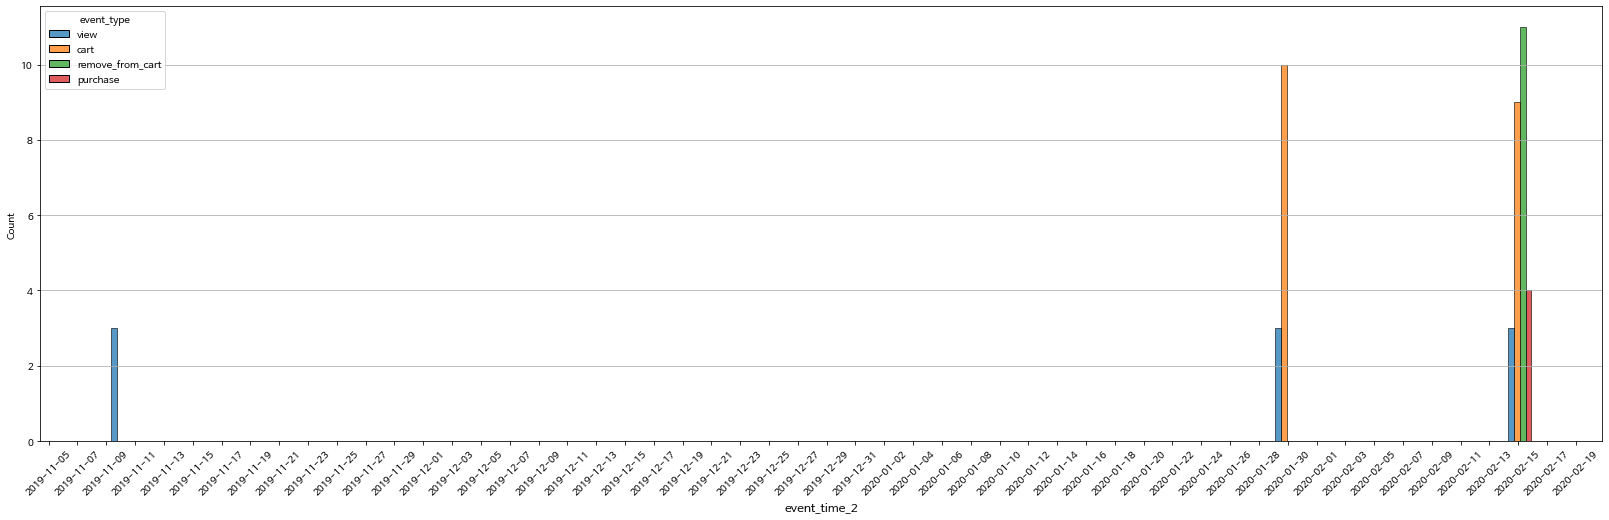

In [ ]:
# 특정 고객 패턴 시각화

plt.figure(figsize=(28,8))
plt.xticks(rotation=45)

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))

plt.grid(axis='y')
plt.xlabel("event_time_2", fontsize=12)

sns.histplot(data=data_total[data_total['user_id']==548866558], x="event_time_2", hue="event_type",multiple="dodge", shrink=.1)

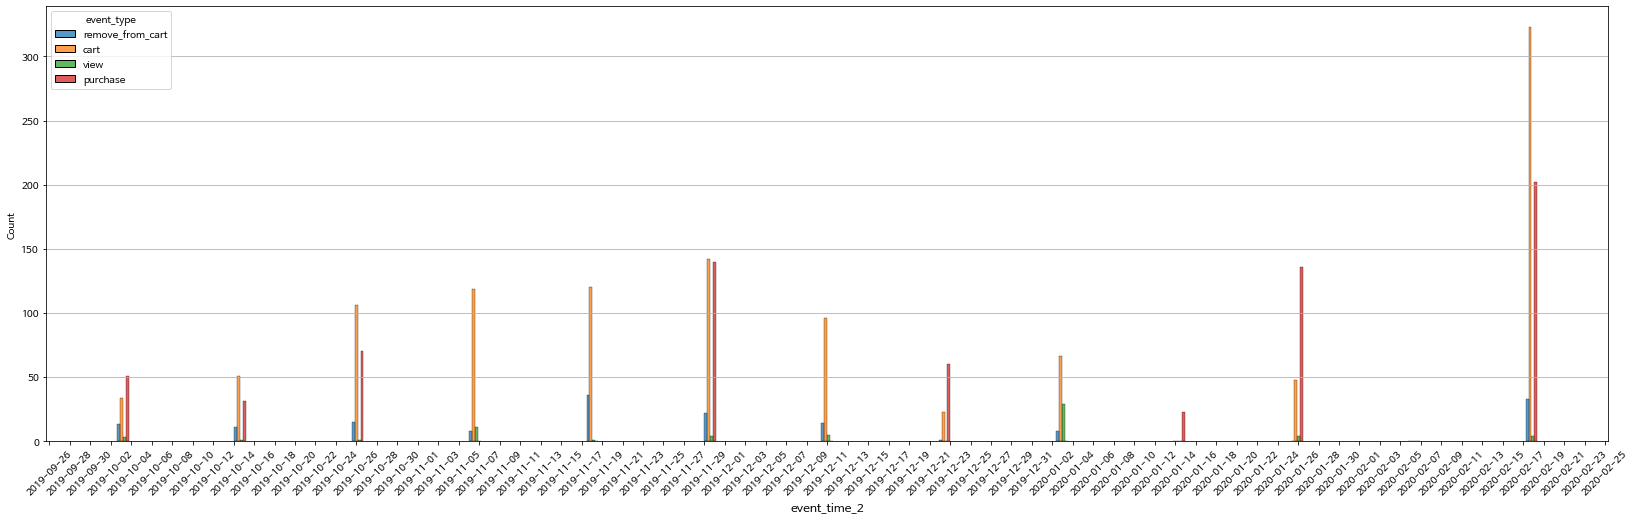

In [ ]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=45)

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))

plt.grid(axis='y')
plt.xlabel("event_time_2", fontsize=12)

sns.histplot(data=data_total[data_total['user_id']==480463194], x="event_time_2", hue="event_type",multiple="dodge", shrink=.1)

In [ ]:
data_total[data_total['user_id']==480463194].tail(30)

,event_type,product_id,brand,price,user_id,event_time_2,month,day_of_week,day,hour,category_id,count,label,event_time_3
19254091,purchase,5883648,rosi,0.79,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580007776650194,2065,1,2020-02-28 05:55:53+00:00
19254092,purchase,5883649,rosi,0.79,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580007776650194,2065,1,2020-02-28 05:55:53+00:00
19254093,purchase,5888545,rosi,0.79,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580007776650194,2065,1,2020-02-28 05:55:53+00:00
19254094,purchase,5888546,rosi,0.79,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580007776650194,2065,1,2020-02-28 05:55:53+00:00
19254095,purchase,5889183,NaN,2.86,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1897124478404526487,2065,1,2020-02-28 05:55:53+00:00
19254096,purchase,5889184,NaN,2.86,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1897124478404526487,2065,1,2020-02-28 05:55:53+00:00
19254097,purchase,5889185,NaN,2.86,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1897124478404526487,2065,1,2020-02-28 05:55:53+00:00
19254098,purchase,5889186,NaN,2.86,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1897124478404526487,2065,1,2020-02-28 05:55:53+00:00
19254099,purchase,5889482,severina,0.56,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580009622143014,2065,1,2020-02-28 05:55:53+00:00
19254100,purchase,5889483,severina,0.56,480463194,2020-02-28 05:55:53+00:00,2020-02,Friday,28,5,1487580009622143014,2065,1,2020-02-28 05:55:53+00:00


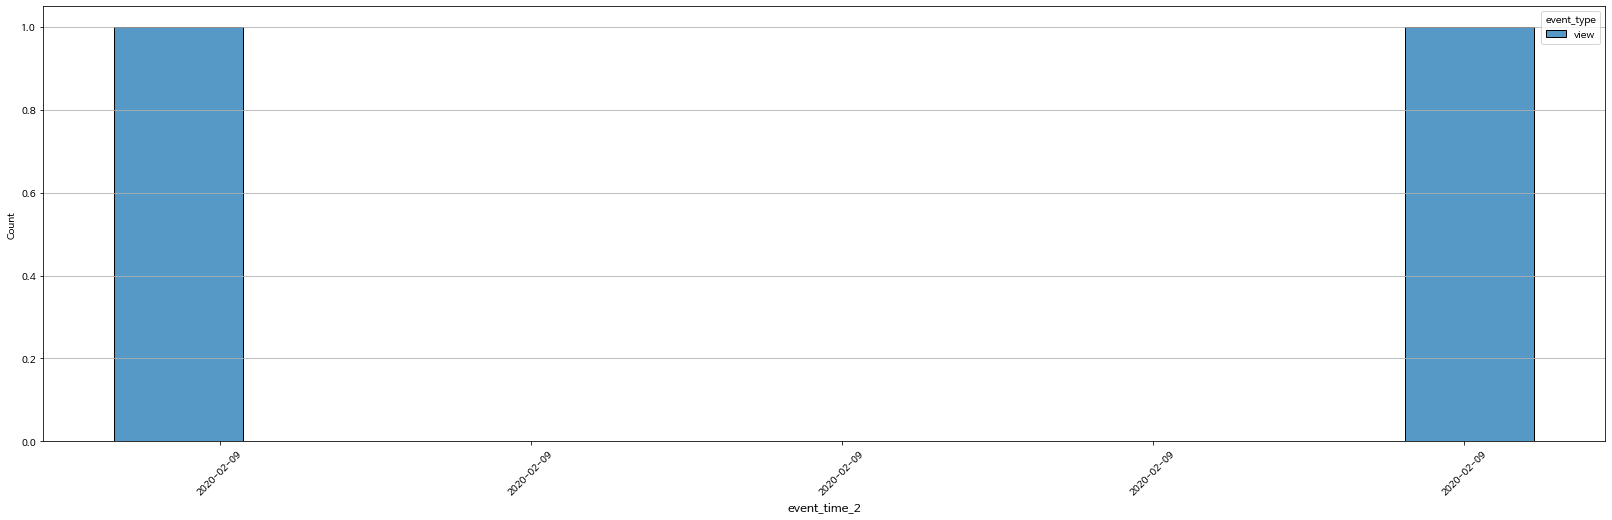

In [ ]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=45)

ax=plt.gca()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y-%m-%d"))

plt.grid(axis='y')
plt.xlabel("event_time_2", fontsize=12)

sns.histplot(data=data_total[data_total['user_id']==612368387], x="event_time_2", hue="event_type",multiple="dodge", shrink=.1)

# 결론

## 헤비유저와 일반유저의 차이

2개 유저그룹(상위 0.5%/나머지), 3개 유저그룹(상위0.1%, 상위1.2%, 나머지) 모두<br>
- 구매가격대, 구매건당 품목수, 구매건당 결제금액 차이 확인<br>
- 특정 유저 그룹별 선호 카테고리 발견
      < 헤비유저 인기 카테고리 >
      : 1487580004916134735 외 14개
      < 일반유저 인기 카테고리 >
      : 1487580008246412266 외 12개


    -> 헤비 유저 : 비교적 낮거나 비슷한 가격대 물건 추천
    -> 일반 유저 : 묶음 상품, 선호카테고리 특정 품목 할인 혜택 





## 카테고리 선호 트렌드
* 매출이 상승세인 카테고리<br> 
  1487580013824835799 외 다수 : 품목 증가 -> 고객 선택권 확장

* 매출이 하락세인 카테고리<br>
1487580008447738866 외 다수 : 품목 개선, 카테고리 폐지 -> 사용성 개선, 선택과 집중, 효율성 증대